In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.read_csv("C:/Users/rinky/Downloads/mutualfunds/mutual_funds_data.csv")
df=pd.read_csv("C:/Users/rinky/Downloads/mutualfunds/mutual_funds_data.csv")
df.head()

scheme_name  min_sip  min_lumpsum  \
0  Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...      100          100   
1                     Aditya Birla SL Arbitrage Fund     1000         1000   
2     Aditya Birla SL Asset Allocator FoF-Dir Growth     1000         1000   
3   Aditya Birla SL Bal Bhavishya Yojna – Dir Growth      500         1000   
4            Aditya Birla SL Balanced Advantage Fund      100          100   

   expense_ratio  fund_size_cr  fund_age_yr        fund_manager sortino  \
0           0.27          10.0           10      Kaustubh Gupta    0.32   
1           0.36        4288.0           10    Lovelish Solanki    1.33   
2           0.53         157.0           10  Vinod Narayan Bhat    3.44   
3           0.76         637.0            4         Atul Penkar    2.18   
4           0.61        6386.0           10        Mohit Sharma    3.69   

   alpha     sd  beta sharpe  risk_level                           amc_name  \
0   2.24   9.39  0.01   0.24           3  Aditya Birla Sun Life Mutual Fund   
1   1.53   0.72  0.56    1.1           1  Aditya Birla Sun Life Mutual Fund   
2   2.67  10.58  0.67   1.42           5  Aditya Birla Sun Life Mutual Fund   
3  -6.37  14.99  0.85    0.9           6  Aditya Birla Sun Life Mutual Fund   
4   1.99  10.38  0.68   1.39           6  Aditya Birla Sun Life Mutual Fund   

   rating           category                                    sub_category  \
0       3              Other                                   FoFs Domestic   
1       3             Hybrid                          Arbitrage Mutual Funds   
2       3              Other                                   FoFs Domestic   
3       2  Solution Oriented                                 Childrens Funds   
4       4             Hybrid  Dynamic Asset Allocation or Balanced Advantage   

   returns_1yr  returns_3yr  returns_5yr  
0          4.0          6.5          6.9  
1          5.6          4.8          5.5  
2          2.0         18.9          9.7  
3         -0.7         17.1          NaN  
4          4.5         18.6          9.7

In [2]:
df.shape

(814, 20)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [4]:
df['risk_level'].replace({1:'Low',2:'Moderately Low',3:'Moderate',4:'Moderately High',5:'High',6:'Very High'},inplace=True)

In [5]:
df.isnull().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino            0
alpha              0
sd                 0
beta               0
sharpe             0
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df[df['returns_3yr'].isnull()]

scheme_name  min_sip  min_lumpsum  \
61                              AXIS Floater Fund     1000         5000   
104    Baroda BNP Paribas Banking & PSU Bond Fund      500         5000   
125  BHARAT Bond FOF – April 2025 – Direct Growth      500         1000   
154                              DSP Floater Fund      500          500   
398            Invesco India Medium Duration Fund     1000         1000   
411                   ITI Banking & PSU Debt Fund      500         5000   
412                         ITI Dynamic Bond Fund      500         5000   
417                 ITI Ultra Short Duration Fund      500         5000   
495         Mahindra Manulife Short Duration Fund      500         1000   
497         Mirae Asset Banking and PSU Debt Fund     1000         5000   
499               Mirae Asset Corporate Bond Fund     1000         5000   
509                 Mirae Asset Money Market Fund     1000         5000   
514         Mirae Asset Ultra Short Duration Fund     1000         5000   
631                   SBI Floating Rate Debt Fund      500         5000   
689                       Sundaram Large Cap Fund      100          100   
720                       Tata Floating Rate Fund      150         5000   
755               TRUSTMF Banking & PSU Debt Fund     1000         1000   
756                           TRUSTMF Liquid Fund     1000         1000   
757                       TRUSTMF Short Term Fund     1000         1000   
769                    Union Medium Duration Fund      500         1000   
770                       Union Money Market Fund     2000         5000   

     expense_ratio  fund_size_cr  fund_age_yr          fund_manager sortino  \
61            0.16         416.0            2        Aditya Pagaria       -   
104           0.39          40.0            2       Prashant Pimple       -   
125           0.06        3912.0            3          Dhawal Dalal       -   
154           0.24         983.0            2          Kedar Karnik       -   
398           0.40         306.0            2            Vikas Garg       -   
411           0.15          27.0            2         Vikrant Mehta       -   
412           0.14          57.0            2         Vikrant Mehta       -   
417           0.10         119.0            2         Vikrant Mehta       -   
495           0.29          43.0            2             Rahul Pal       -   
497           0.34          89.0            3          Basant Bafna       -   
499           0.46          57.0            2        Mahendra Jajoo       -   
509           0.25          59.0            2          Basant Bafna       -   
514           0.29         284.0            2          Basant Bafna       -   
631           0.26        1604.0            2  Rajeev Radhakrishnan       -   
689           0.60        2855.0            2          Sudhir Kedia    3.64   
720           0.30         225.0            2          Akhil Mittal       -   
755           0.21         345.0            2         Anand Nevatia       -   
756           0.10         205.0            2         Anand Nevatia       -   
757           0.23          94.0            2         Anand Nevatia       -   
769           0.64         170.0            3       Parijat Agrawal       -   
770           0.24         144.0            2       Parijat Agrawal       -   

     alpha     sd  beta sharpe      risk_level  \
61       -      -     -      -  Moderately Low   
104      -      -     -      -  Moderately Low   
125      -      -     -      -  Moderately Low   
154      -      -     -      -  Moderately Low   
398      -      -     -      -        Moderate   
411      -      -     -      -  Moderately Low   
412      -      -     -      -  Moderately Low   
417      -      -     -      -  Moderately Low   
495      -      -     -      -        Moderate   
497      -      -     -      -  Moderately Low   
499      -      -     -      -  Moderately Low   
509      -      -     -      -  Moderately Low  

In [8]:
df[df['returns_5yr'].isnull()]

scheme_name  min_sip  min_lumpsum  \
3     Aditya Birla SL Bal Bhavishya Yojna – Dir Growth      500         1000   
38                      Aditya Birla SL Overnight Fund        0         5000   
41   Aditya Birla SL Retirement-The 30s Plan-Dir Gr...      500         1000   
42   Aditya Birla SL Retirement-The 40s Plan-Dir Gr...      500         1000   
43   Aditya Birla SL Retirement-The 50s Plan-Dir Gr...      500         1000   
..                                                 ...      ...          ...   
784                            UTI-Equity Savings Fund        0         5000   
786                                   UTI-Floater Fund      500          500   
801                       UTI-Nifty Next 50 Index Fund        0         5000   
811                       WhiteOak Capital Liquid Fund      500          500   
813             WhiteOak Capital Ultra Short Term Fund      500          500   

     expense_ratio  fund_size_cr  fund_age_yr         fund_manager sortino  \
3             0.76         637.0            4          Atul Penkar    2.18   
38            0.07       13399.0            4       Kaustubh Gupta    0.11   
41            1.06         258.0            4          Dhaval Shah    2.41   
42            1.07          91.0            4          Dhaval Shah    2.34   
43            0.63          27.0            4          Dhaval Shah    0.29   
..             ...           ...          ...                  ...     ...   
784           0.68         257.0            5           V Srivatsa    4.06   
786           0.35        1637.0            4       Sudhir Agrawal    3.07   
801           0.33        1926.0            5  Sharwan Kumar Goyal    1.71   
811           0.26         197.0            4      Piyush Baranwal   -0.42   
813           0.33         141.0            4      Piyush Baranwal    2.81   

     alpha     sd  beta sharpe       risk_level  \
3    -6.37  14.99  0.85    0.9        Very High   
38    0.58   0.35  0.43   0.02              Low   
41   -5.61  14.94  0.84   0.94        Very High   
42   -3.14  11.86  0.77   0.93        Very High   
43   -2.04   2.99  0.34   0.13  Moderately High   
..     ...    ...   ...    ...              ...   
784   3.98   5.99  0.91   1.75         Moderate   
786   3.41   1.05  1.41   1.45   Moderately Low   
801  -4.62  18.16  0.99   0.97        Very High   
811   0.93   0.39  0.72  -0.07              Low   
813    1.2   0.72  0.47    0.8              Low   

                              amc_name  rating           category  \
3    Aditya Birla Sun Life Mutual Fund       2  Solution Oriented   
38   Aditya Birla Sun Life Mutual Fund       3               Debt   
41   Aditya Birla Sun Life Mutual Fund       2  Solution Oriented   
42   Aditya Birla Sun Life Mutual Fund       2  Solution Oriented   
43   Aditya Birla Sun Life Mutual Fund       2  Solution Oriented   
..                                 ...     ...                ...   
784                    UTI Mutual Fund       4             Hybrid   
786                    UTI Mutual Fund       3               Debt   
801                    UTI Mutual Fund       2              Other   
811       WhiteOak Capital Mutual Fund       1               Debt   
813       WhiteOak Capital Mutual Fund       2               Debt   

                    sub_category  returns_1yr  returns_3yr  returns_5yr  
3                Childrens Funds         -0.7         17.1          NaN  
38        Overnight Mutual Funds          5.4          3.9          NaN  
41              Retirement Funds          0.0         17.9          NaN  
42              Retirement Funds         -0.1         15.0          NaN  
43              Retirement Funds          3.0          4.6          NaN  
..                           ...          ...          ...          ...  
784  Equity Savings Mutual Funds          6.1         14.7          NaN  
786         Floater Mutual Funds          5.1          5.9          NaN  
801                  Index Funds     

In [9]:
mean_returns_by_category = df.groupby('category')['returns_3yr','returns_5yr'].mean()
mean_returns_by_category

C:\Users\rinky\AppData\Local\Temp\ipykernel_3708\2230213869.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_returns_by_category = df.groupby('category')['returns_3yr','returns_5yr'].mean()


returns_3yr  returns_5yr
category                                   
Debt                  6.228517     6.385446
Equity               29.738111    12.069767
Hybrid               15.272414     8.581053
Other                20.792405    10.710938
Solution Oriented    18.167857     9.747059

In [10]:
#Missing values in 3 and 5 year returns
#Replacing them by means
df['returns_3yr'] = df.groupby('category')['returns_3yr'].apply(lambda x: x.fillna(x.mean()))
df['returns_5yr'] = df.groupby('category')['returns_5yr'].apply(lambda x: x.fillna(x.mean()))

In [11]:
df.isnull().sum()


scheme_name      0
min_sip          0
min_lumpsum      0
expense_ratio    0
fund_size_cr     0
fund_age_yr      0
fund_manager     0
sortino          0
alpha            0
sd               0
beta             0
sharpe           0
risk_level       0
amc_name         0
rating           0
category         0
sub_category     0
returns_1yr      0
returns_3yr      0
returns_5yr      0
dtype: int64

In [12]:
df.describe()


min_sip   min_lumpsum  expense_ratio  fund_size_cr  fund_age_yr  \
count   814.000000    814.000000     814.000000    814.000000   814.000000   
mean    528.500000   3047.468059       0.713231   3812.854214     8.319410   
std     369.184517   2514.619513       0.482161   7181.479475     2.640622   
min       0.000000      0.000000       0.000000      2.380000     1.000000   
25%     150.000000    500.000000       0.310000    175.250000     6.000000   
50%     500.000000   5000.000000       0.615000    940.500000    10.000000   
75%    1000.000000   5000.000000       1.030000   3819.000000    10.000000   
max    2000.000000  25000.000000       2.590000  57052.000000    17.000000   

           rating  returns_1yr  returns_3yr  returns_5yr  
count  814.000000   814.000000   814.000000   814.000000  
mean     2.641278     3.921376    18.254880     9.389900  
std      1.463476     6.675502    12.101639     3.497044  
min      0.000000   -19.700000     3.300000    -4.100000  
25%      2.000000     1.500000     6.228517     6.389085  
50%      3.000000     4.400000    18.050000     8.800000  
75%      4.000000     5.600000    27.000000    12.069767  
max      5.000000   130.800000    71.400000    23.200000

In [13]:
df.head()

scheme_name  min_sip  min_lumpsum  \
0  Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...      100          100   
1                     Aditya Birla SL Arbitrage Fund     1000         1000   
2     Aditya Birla SL Asset Allocator FoF-Dir Growth     1000         1000   
3   Aditya Birla SL Bal Bhavishya Yojna – Dir Growth      500         1000   
4            Aditya Birla SL Balanced Advantage Fund      100          100   

   expense_ratio  fund_size_cr  fund_age_yr        fund_manager sortino  \
0           0.27          10.0           10      Kaustubh Gupta    0.32   
1           0.36        4288.0           10    Lovelish Solanki    1.33   
2           0.53         157.0           10  Vinod Narayan Bhat    3.44   
3           0.76         637.0            4         Atul Penkar    2.18   
4           0.61        6386.0           10        Mohit Sharma    3.69   

   alpha     sd  beta sharpe risk_level                           amc_name  \
0   2.24   9.39  0.01   0.24   Moderate  Aditya Birla Sun Life Mutual Fund   
1   1.53   0.72  0.56    1.1        Low  Aditya Birla Sun Life Mutual Fund   
2   2.67  10.58  0.67   1.42       High  Aditya Birla Sun Life Mutual Fund   
3  -6.37  14.99  0.85    0.9  Very High  Aditya Birla Sun Life Mutual Fund   
4   1.99  10.38  0.68   1.39  Very High  Aditya Birla Sun Life Mutual Fund   

   rating           category                                    sub_category  \
0       3              Other                                   FoFs Domestic   
1       3             Hybrid                          Arbitrage Mutual Funds   
2       3              Other                                   FoFs Domestic   
3       2  Solution Oriented                                 Childrens Funds   
4       4             Hybrid  Dynamic Asset Allocation or Balanced Advantage   

   returns_1yr  returns_3yr  returns_5yr  
0          4.0          6.5     6.900000  
1          5.6          4.8     5.500000  
2          2.0         18.9     9.700000  
3         -0.7         17.1     9.747059  
4          4.5         18.6     9.700000

In [14]:
#Fund_Managers_Analysis

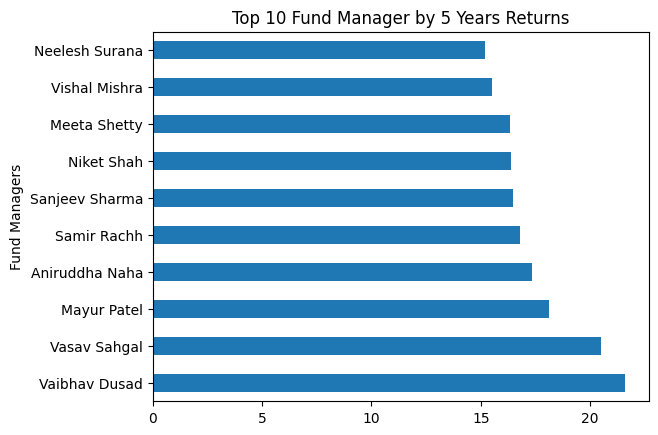

In [15]:
df.groupby(['fund_manager'])['returns_5yr'].mean().sort_values(ascending=False).nlargest(10).plot(kind='barh', xlabel = "Fund Managers")
plt.title('Top 10 Fund Manager by 5 Years Returns')
plt.show()

In [16]:
debt_df = df[df['category'] == 'Debt']
equity_df = df[df['category'] == 'Equity']
hybrid_df = df[df['category'] == 'Hybrid']
other_df = df[df['category'] == 'Other']
solution_df = df[df['category'] == 'Solution Oriented']

In [17]:
top_5_debt = debt_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()
top_5_equity = equity_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()
top_5_hybrid = hybrid_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()
top_5_solution = solution_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()
top_5_other = other_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()

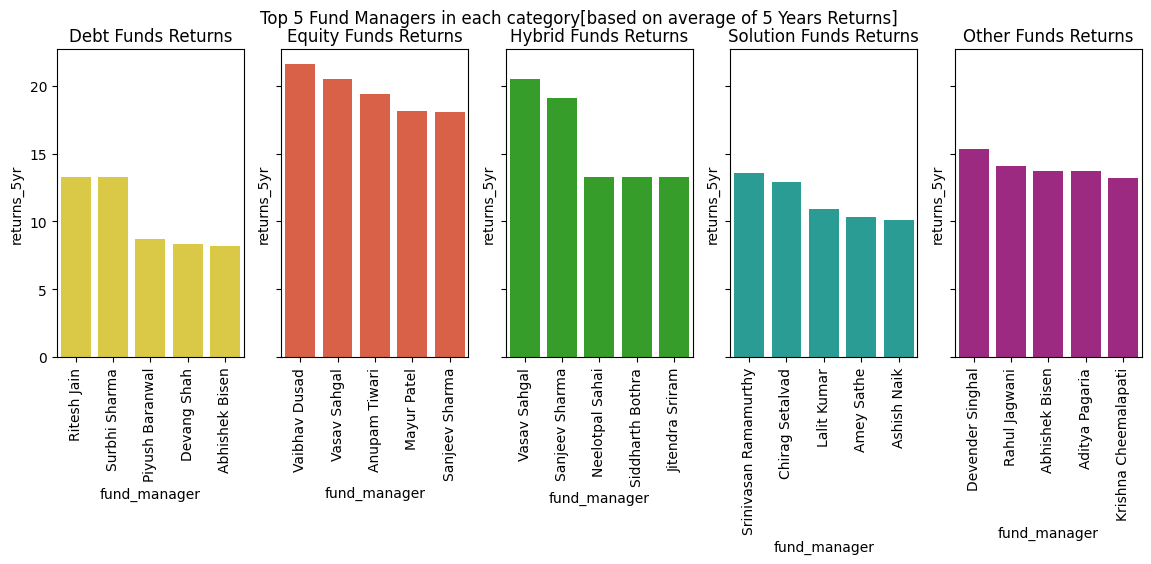

In [18]:
fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(14, 4),sharey='row')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_debt, ax=ax[0],color='#F1DC2F')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_equity, ax=ax[1],color='#F1512F')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_hybrid, ax=ax[2],color='#27AF17')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_solution, ax=ax[3],color='#17AFA3')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_other, ax=ax[4],color='#AF178A')
ax[0].set_title('Debt Funds Returns')
ax[0].set_xticklabels(top_5_debt['fund_manager'],rotation='vertical')
ax[1].set_title('Equity Funds Returns')
ax[1].set_xticklabels(top_5_equity['fund_manager'],rotation='vertical')
ax[2].set_title('Hybrid Funds Returns')
ax[2].set_xticklabels(top_5_hybrid['fund_manager'],rotation='vertical')
ax[3].set_title('Solution Funds Returns')
ax[3].set_xticklabels(top_5_solution['fund_manager'],rotation='vertical')
ax[4].set_title('Other Funds Returns')
ax[4].set_xticklabels(top_5_other['fund_manager'],rotation='vertical')
plt.suptitle("Top 5 Fund Managers in each category[based on average of 5 Years Returns] \n")
plt.show()

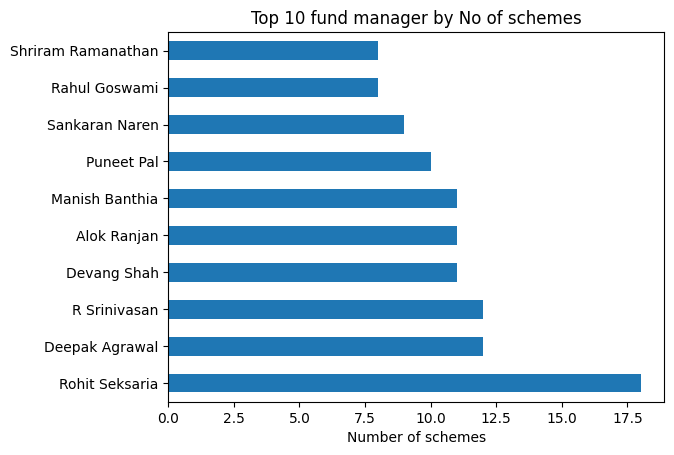

In [19]:
#Top 10 Fund Managers by Number of Schemes
df['fund_manager'].value_counts().nlargest(10).plot(kind='barh')
plt.xlabel('Number of schemes')
plt.title('Top 10 fund manager by No of schemes')
plt.show()

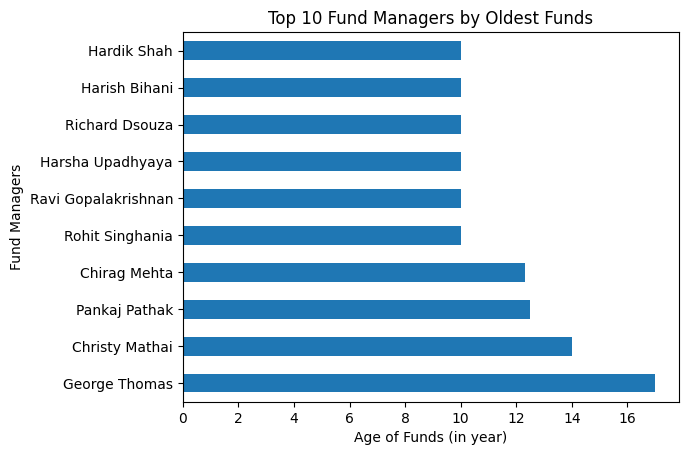

In [20]:
#Top 10 Managers by Mean Age of Funds
df.groupby(['fund_manager'])['fund_age_yr'].mean().sort_values(ascending=False).nlargest(10).plot(kind='barh', xlabel = "Fund Managers")
plt.xlabel('Age of Funds (in year)')
plt.title('Top 10 Fund Managers by Oldest Funds')
plt.show()

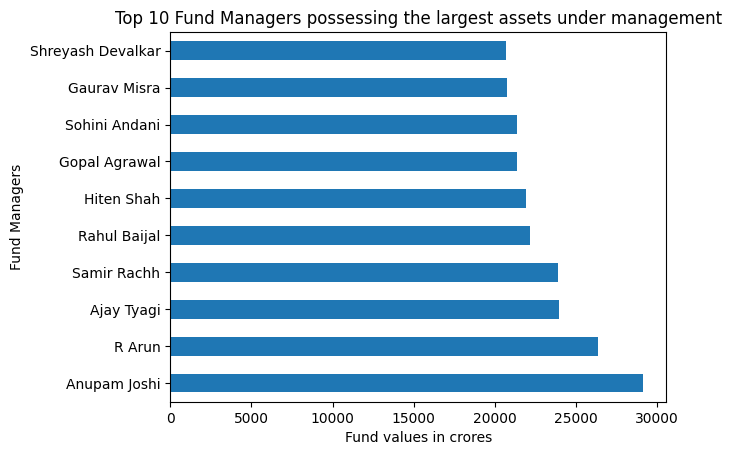

In [21]:
#Top 10 Fund Managers by Size of Assets
df.groupby(['fund_manager'])['fund_size_cr'].mean().sort_values(ascending=False).nlargest(10).plot(kind='barh', xlabel = "Fund Managers")
plt.xlabel('Fund values in crores')
plt.title('Top 10 Fund Managers possessing the largest assets under management')
plt.show()

C:\Users\rinky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='min_sip'>

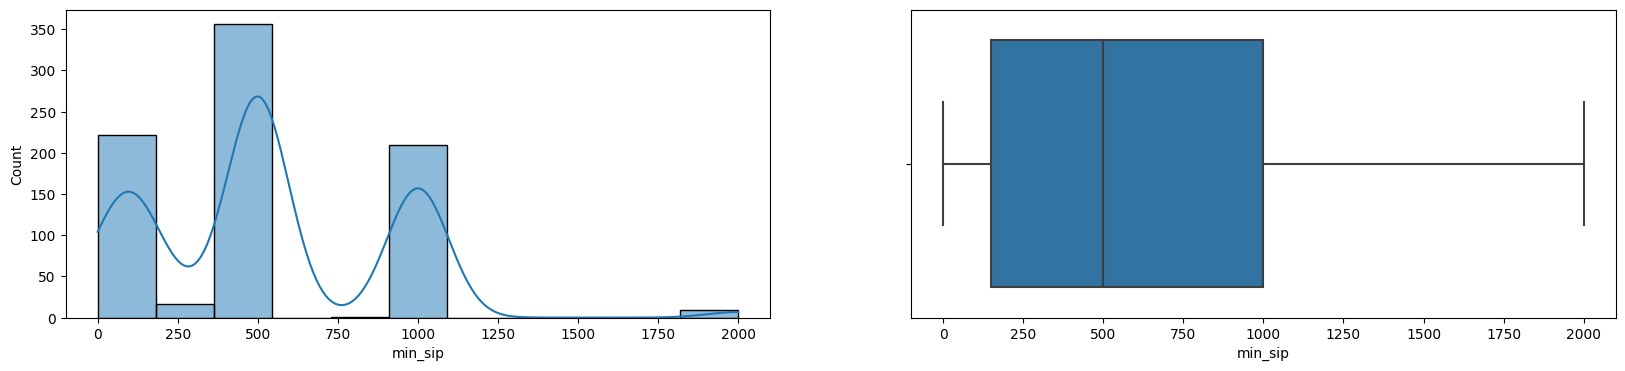

In [22]:
#Analyis on Minimum SIP & Minimum Lumpsum
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20, 4))

sns.histplot(df['min_sip'],ax=ax[0],kde=True)
sns.boxplot(df['min_sip'],ax=ax[1])

C:\Users\rinky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='min_lumpsum'>

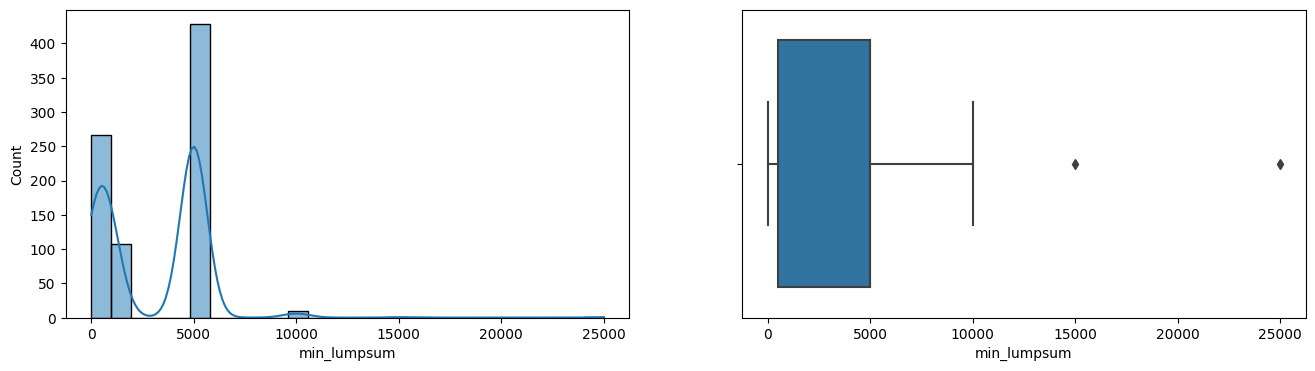

In [23]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16, 4))

sns.histplot(df['min_lumpsum'],ax=ax[0],kde=True)
sns.boxplot(df['min_lumpsum'],ax=ax[1])

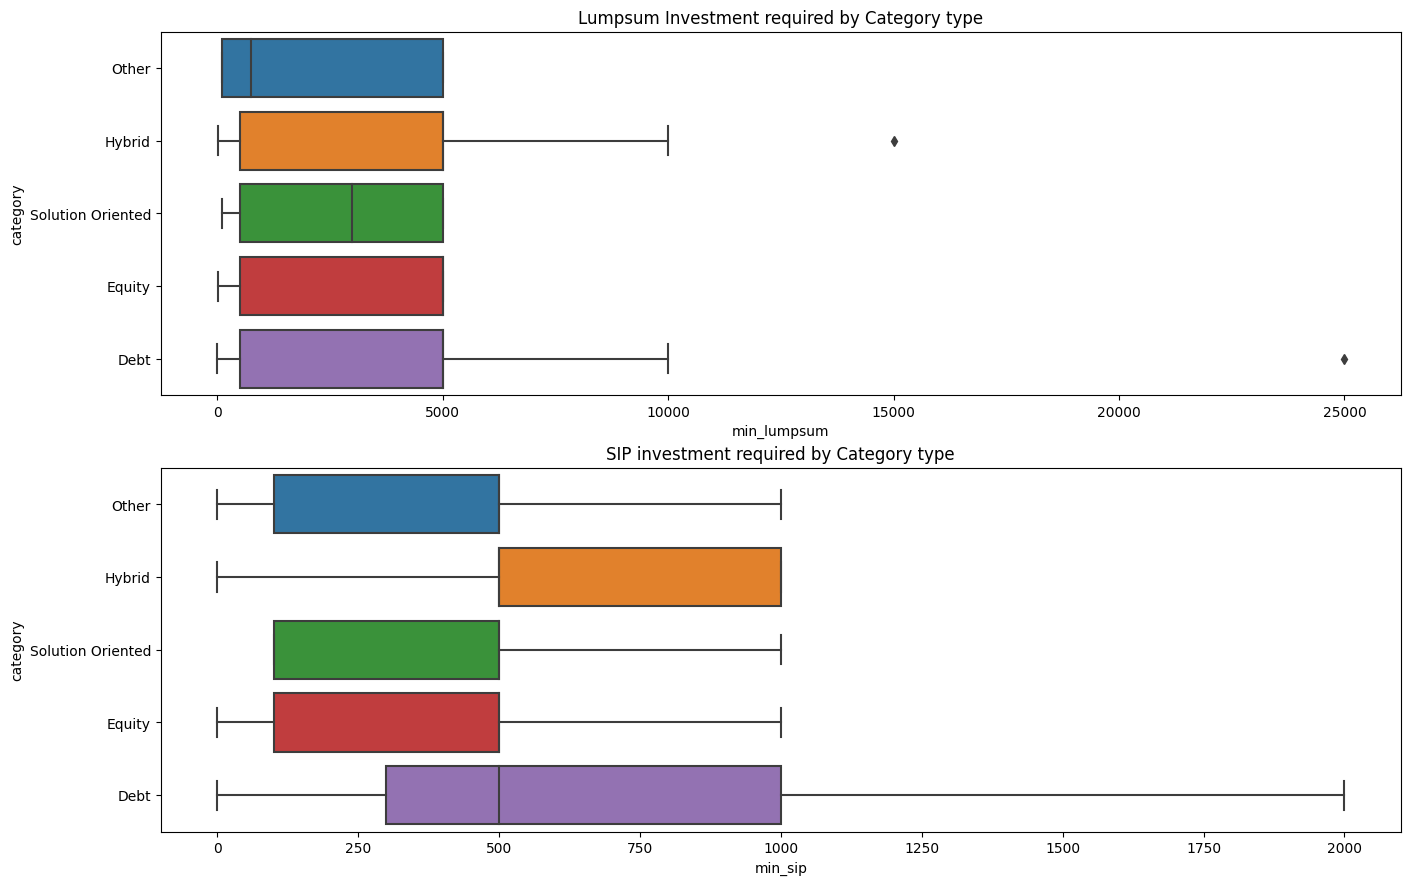

In [24]:
#Distribution by category
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

sns.boxplot(data = df,y=df['category'],x=df['min_lumpsum'],ax=axes[0])
sns.boxplot(data = df,y=df['category'],x=df['min_sip'],ax=axes[1])

axes[0].set_title('Lumpsum Investment required by Category type')
axes[1].set_title('SIP investment required by Category type')
plt.subplots_adjust(bottom=4,top=5)
plt.show()

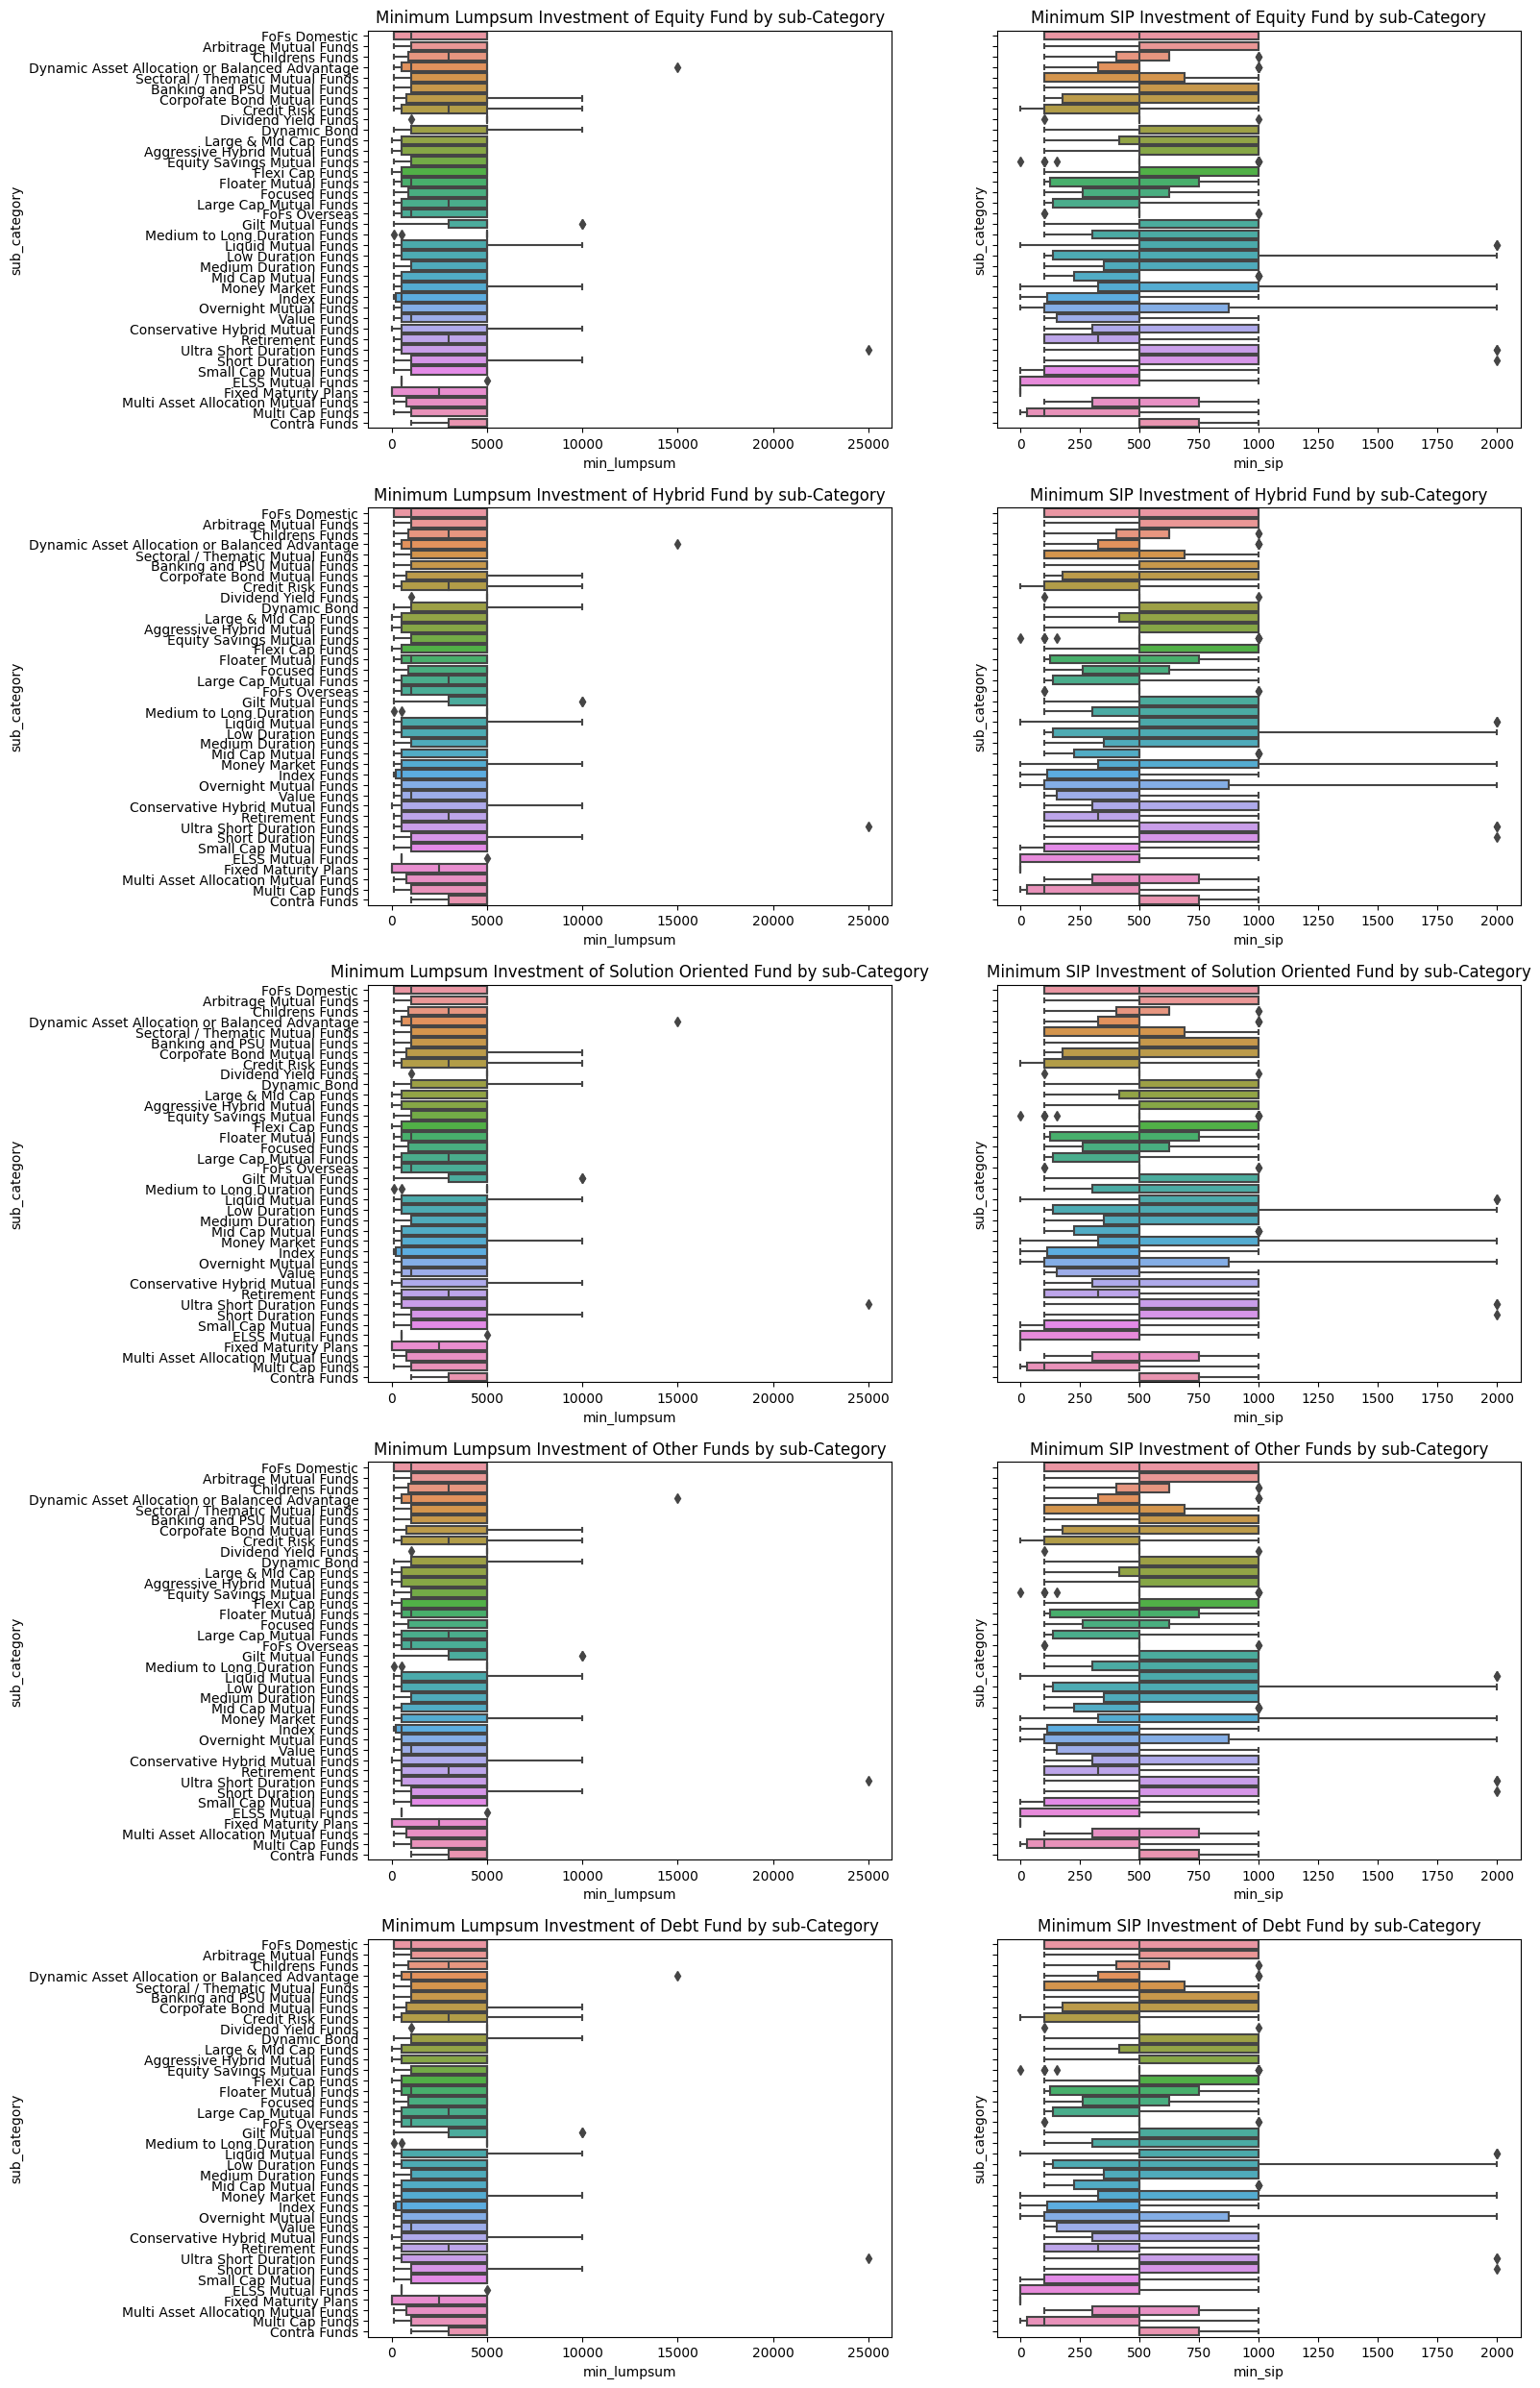

In [25]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,16), sharey = "row")

sns.boxplot(data = equity_df, y=df['sub_category'], x=df['min_lumpsum'], ax=axes[0,0])
sns.boxplot(data = hybrid_df,y=df['sub_category'],x=df['min_lumpsum'],ax=axes[1,0])
sns.boxplot(data = solution_df,y=df['sub_category'],x=df['min_lumpsum'],ax=axes[2,0])
sns.boxplot(data = other_df,y=df['sub_category'],x=df['min_lumpsum'],ax=axes[3,0])
sns.boxplot(data = debt_df,y=df['sub_category'],x=df['min_lumpsum'],ax=axes[4,0])

axes[0,0].set_title('Minimum Lumpsum Investment of Equity Fund by sub-Category')
axes[1,0].set_title('Minimum Lumpsum Investment of Hybrid Fund by sub-Category')
axes[2,0].set_title('Minimum Lumpsum Investment of Solution Oriented Fund by sub-Category')
axes[3,0].set_title('Minimum Lumpsum Investment of Other Funds by sub-Category')
axes[4,0].set_title('Minimum Lumpsum Investment of Debt Fund by sub-Category')

sns.boxplot(data = equity_df,y=df['sub_category'],x=df['min_sip'],ax=axes[0,1])
sns.boxplot(data = hybrid_df,y=df['sub_category'],x=df['min_sip'],ax=axes[1,1])
sns.boxplot(data = solution_df,y=df['sub_category'],x=df['min_sip'],ax=axes[2,1])
sns.boxplot(data = other_df,y=df['sub_category'],x=df['min_sip'],ax=axes[3,1])
sns.boxplot(data = debt_df,y=df['sub_category'],x=df['min_sip'],ax=axes[4,1])

axes[0,1].set_title('Minimum SIP Investment of Equity Fund by sub-Category')
axes[1,1].set_title('Minimum SIP Investment of Hybrid Fund by sub-Category')
axes[2,1].set_title('Minimum SIP Investment of Solution Oriented Fund by sub-Category')
axes[3,1].set_title('Minimum SIP Investment of Other Funds by sub-Category')
axes[4,1].set_title('Minimum SIP Investment of Debt Fund by sub-Category')

plt.subplots_adjust(bottom=2.5,top=4,left=2,right=3)
plt.show()

In [26]:
def fund_size_group(fund_size):
    if fund_size >= 0.0 and fund_size <= 500.0:
        return '0-500'
    elif fund_size > 500.0 and fund_size <= 750.0:
        return '500-750'
    elif fund_size > 750.0 and fund_size <= 2000.0:
        return '750-2000'
    elif fund_size > 2000.0 and fund_size <= 5000.0:
        return '2000-5000'
    elif fund_size > 5000.0 and fund_size <= 10000.0:
        return '5000-10000'
    elif fund_size > 10000.0 and fund_size <= 50000.0:
        return '10000-50000'
    else:
        return '>50000'

In [27]:
df['fund_size_group'] = df['fund_size_cr'].apply(fund_size_group)

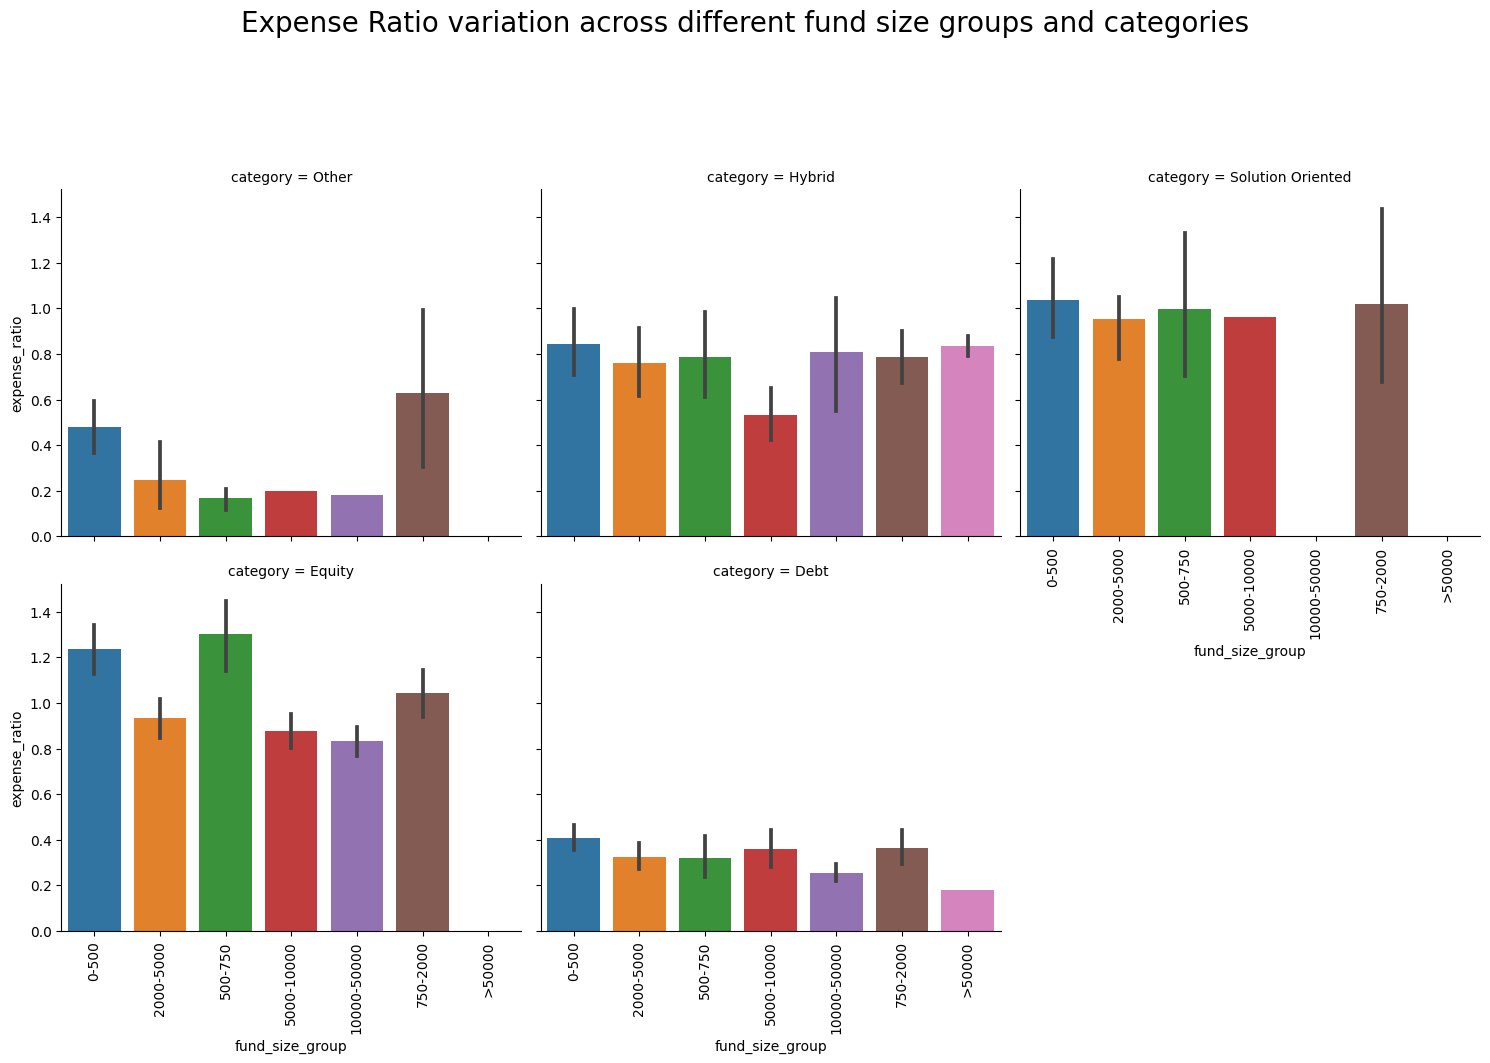

In [29]:
g = sns.catplot(data=df, x='fund_size_group', y='expense_ratio', kind='bar', col='category', col_wrap=3)
g.set_xticklabels(rotation='vertical')
plt.suptitle('Expense Ratio variation across different fund size groups and categories',fontsize=20)
plt.subplots_adjust(top=0.8)
plt.show()

C:\Users\rinky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='expense_ratio'>

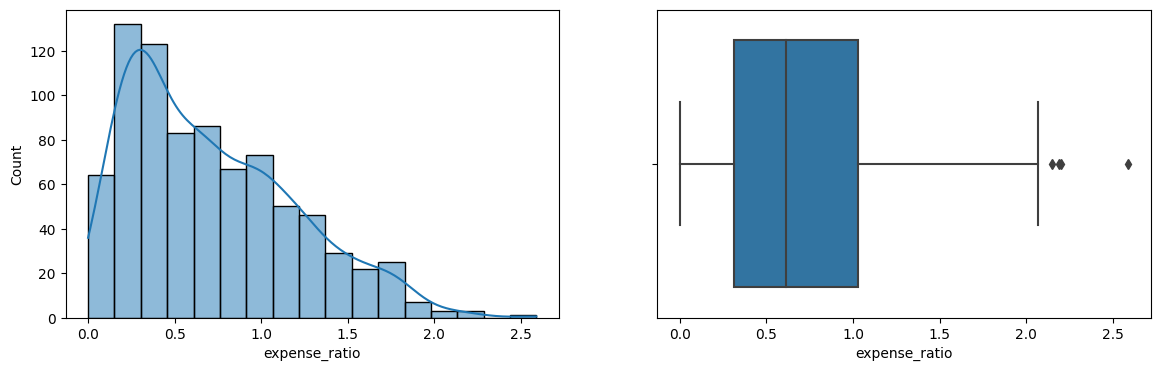

In [30]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14, 4))
sns.histplot(df['expense_ratio'],ax=ax[0],kde=True)
sns.boxplot(df['expense_ratio'],ax=ax[1])

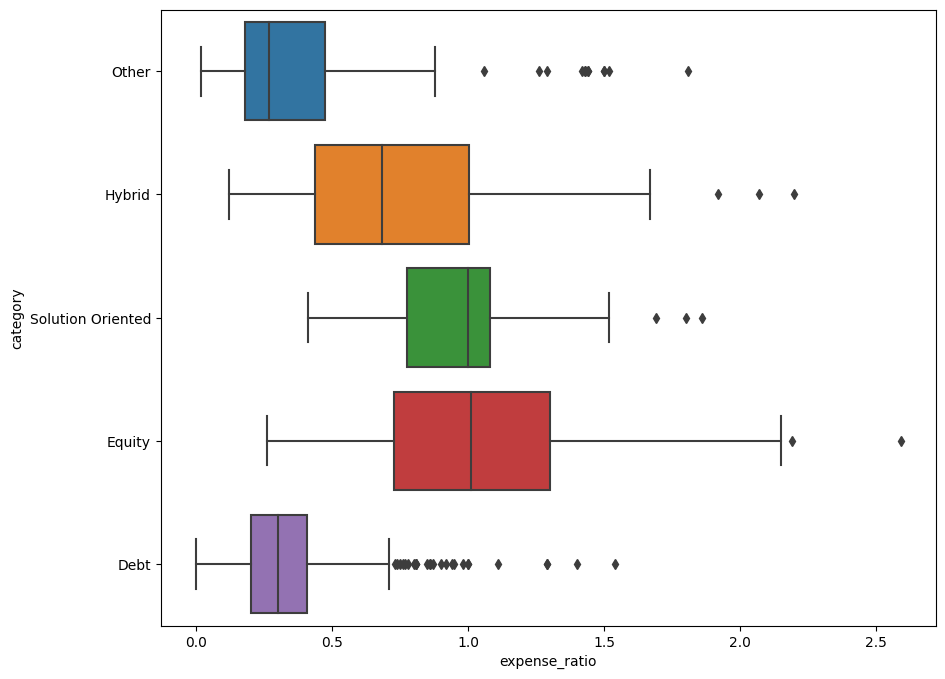

In [32]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df, y=df['category'], x=df['expense_ratio'])
plt.show()

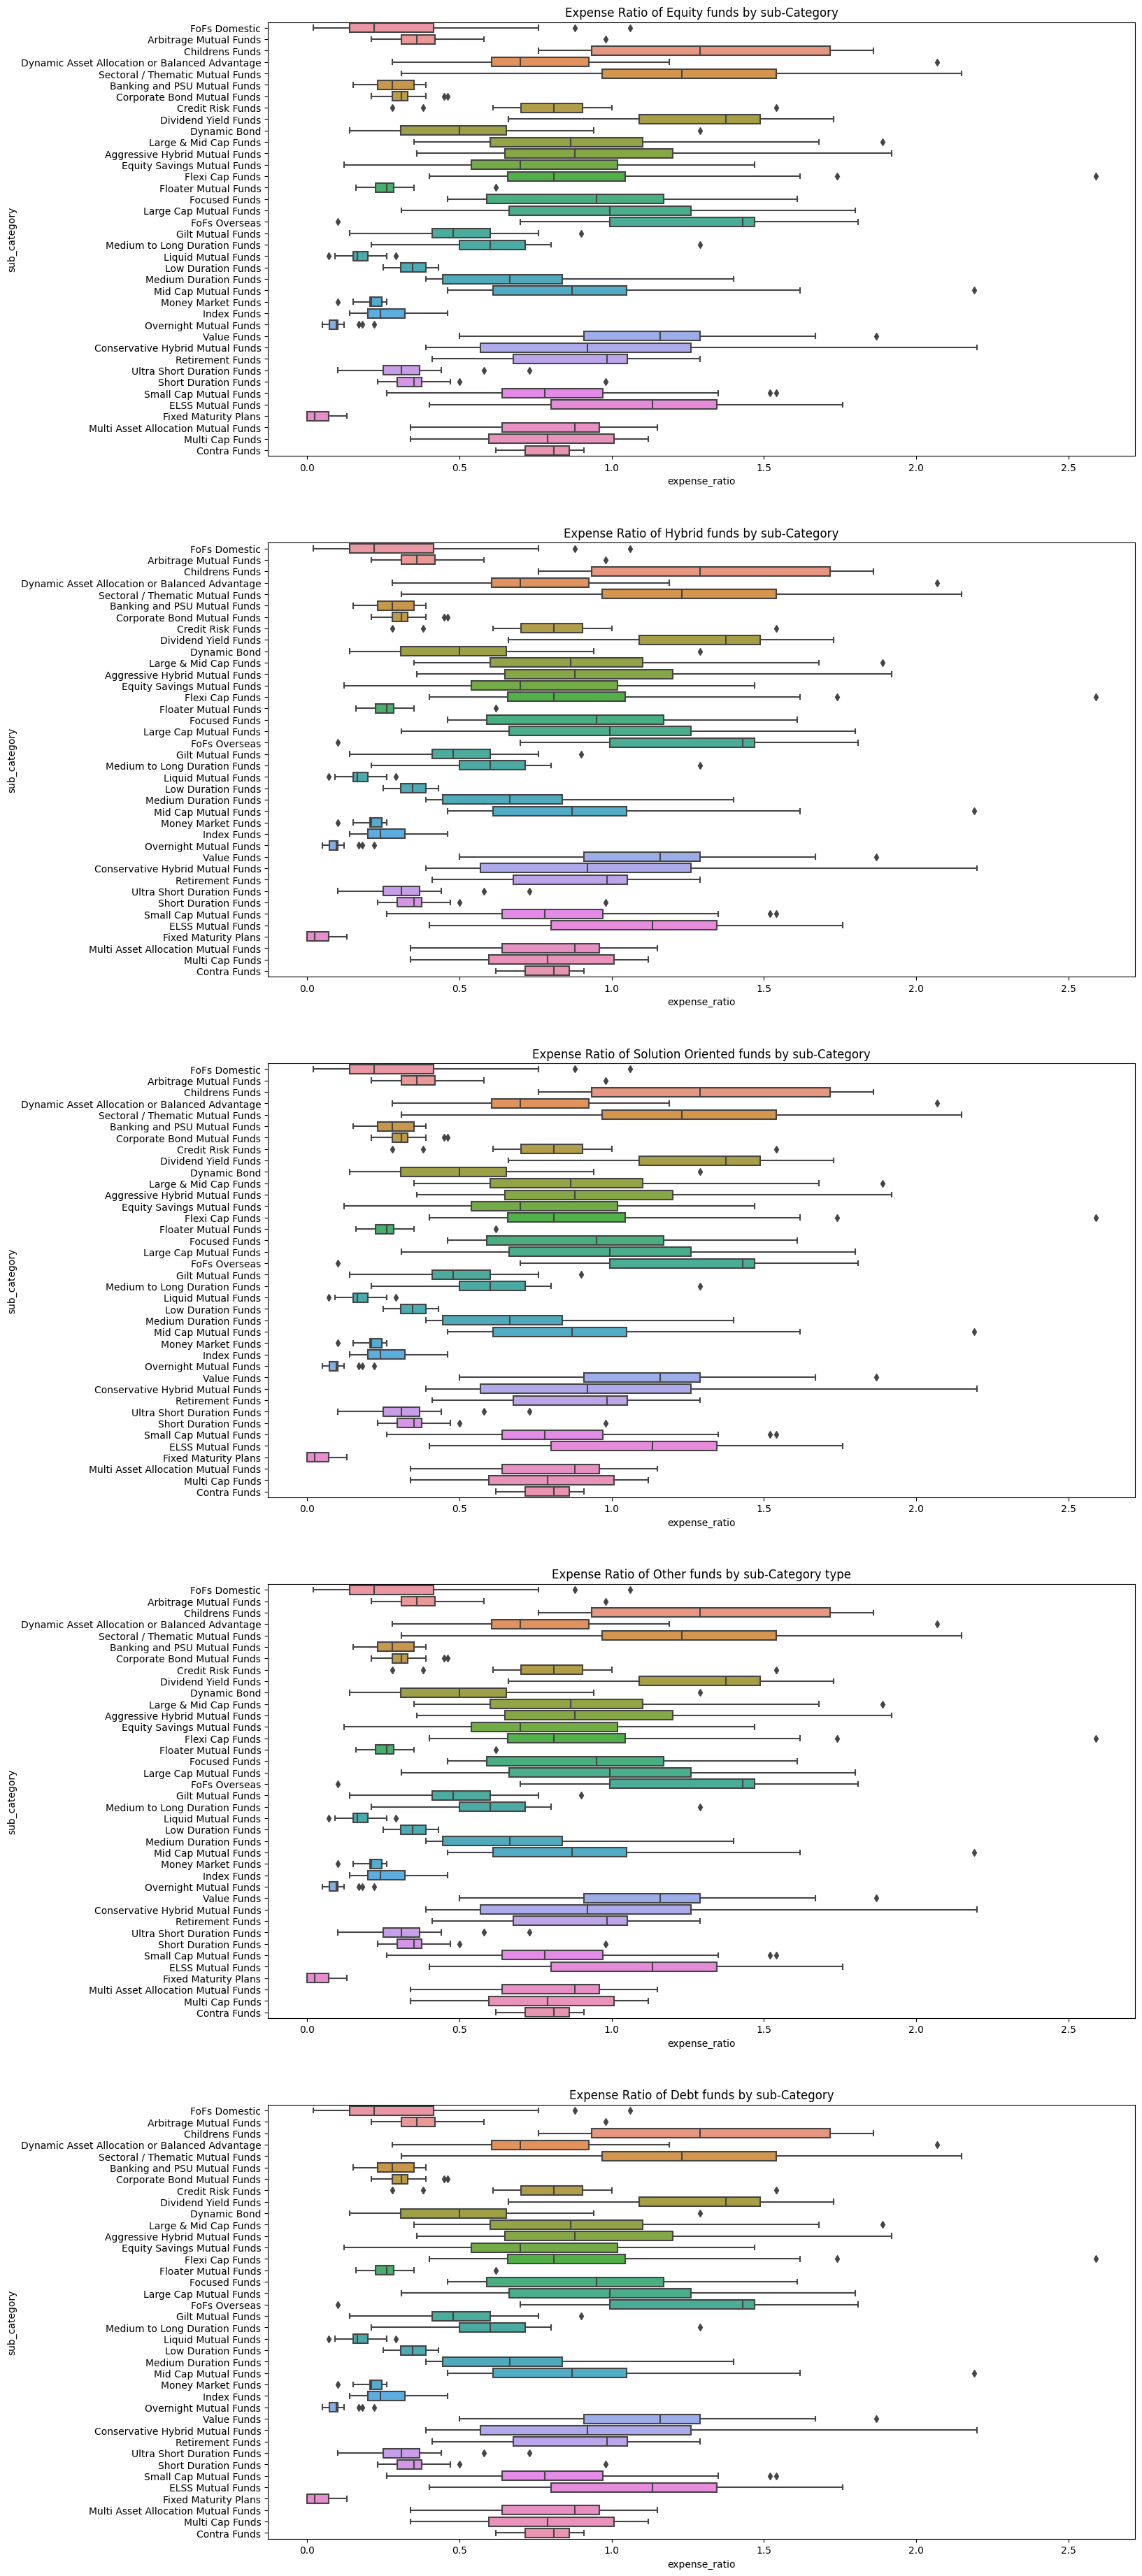

In [38]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(16, 24))
sns.boxplot(data = equity_df,y=df['sub_category'],x=df['expense_ratio'],ax=axes[0])
sns.boxplot(data = hybrid_df,y=df['sub_category'],x=df['expense_ratio'],ax=axes[1])
sns.boxplot(data = solution_df,y=df['sub_category'],x=df['expense_ratio'],ax=axes[2])
sns.boxplot(data = other_df,y=df['sub_category'],x=df['expense_ratio'],ax=axes[3])
sns.boxplot(data = debt_df,y=df['sub_category'],x=df['expense_ratio'],ax=axes[4])

axes[0].set_title('Expense Ratio of Equity funds by sub-Category')
axes[1].set_title('Expense Ratio of Hybrid funds by sub-Category')
axes[2].set_title('Expense Ratio of Solution Oriented funds by sub-Category')
axes[3].set_title('Expense Ratio of Other funds by sub-Category type')
axes[4].set_title('Expense Ratio of Debt funds by sub-Category')

plt.subplots_adjust(bottom=2.5,top=4)
plt.show()

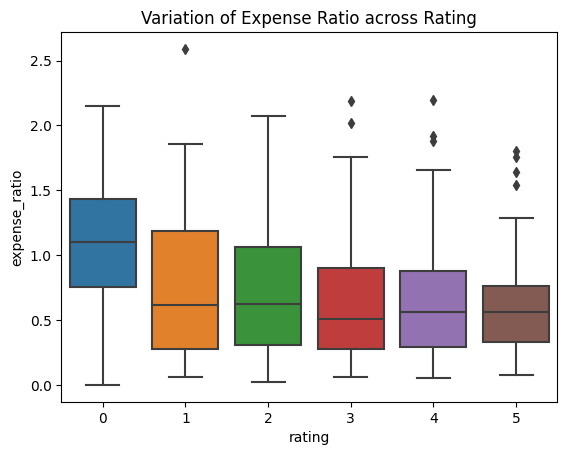

In [42]:
sns.boxplot(data = df,x=df['rating'],y=df['expense_ratio'])
plt.title('Variation of Expense Ratio across Rating')
plt.show()

In [43]:
#checking why 0 rating has higher expense ratio
pd.crosstab(df['rating'],df['category'],margins=True) 

category  Debt  Equity  Hybrid  Other  Solution Oriented  All
rating                                                       
0            4      78       2     19                  5  108
1           22      18      10      4                  4   58
2           66      54      25     14                  9  168
3           96      76      39     27                  5  243
4           64      52      27     12                  3  158
5           30      30      13      4                  2   79
All        282     308     116     80                 28  814

In [44]:
#higher expense ratio due to presence of more equity funds, which have higher expense ratios

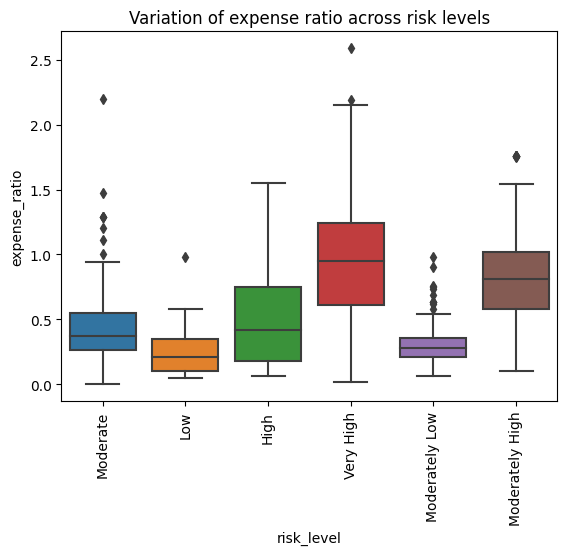

In [45]:
sns.boxplot(data = df,x=df['risk_level'],y=df['expense_ratio'])
plt.title('Variation of expense ratio across risk levels')
plt.xticks(rotation='vertical')
plt.show()

In [46]:
#Finding why expense ratio is high risk funds have a high expense ratio

In [47]:
pd.crosstab(df['risk_level'],df['category'],margins=True)

category         Debt  Equity  Hybrid  Other  Solution Oriented  All
risk_level                                                          
High                3       0       7     15                  2   27
Low                32       0      21      0                  0   53
Moderate          109       0       9      4                  2  124
Moderately High    16       8      29      6                  6   65
Moderately Low    121       1       4      1                  0  127
Very High           1     299      46     54                 18  418
All               282     308     116     80                 28  814

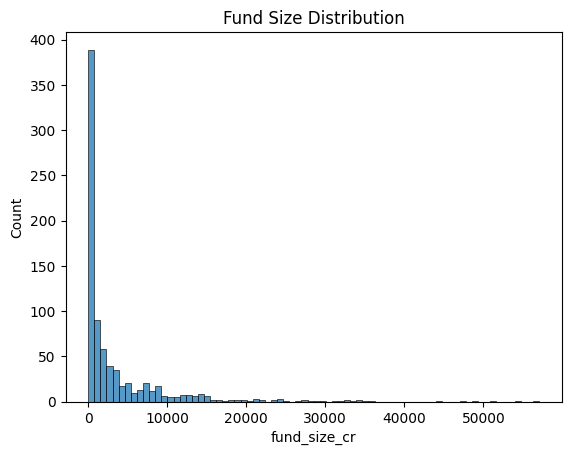

In [48]:
sns.histplot(df['fund_size_cr'])
plt.title('Fund Size Distribution')
plt.show()

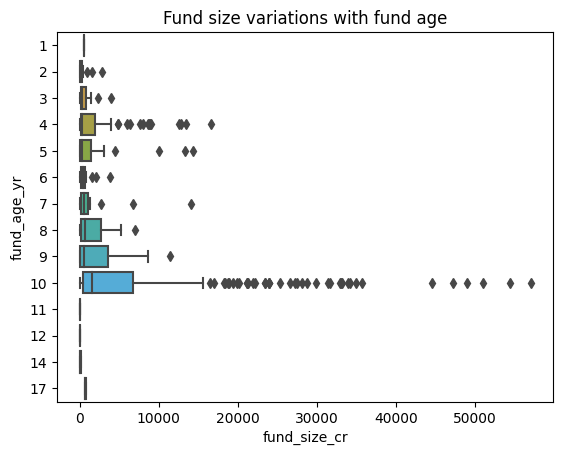

In [54]:
sns.boxplot(data = df,x=df['fund_size_cr'],y=df['fund_age_yr'], orient = 'h')
plt.title('Fund size variations with fund age')
plt.show()

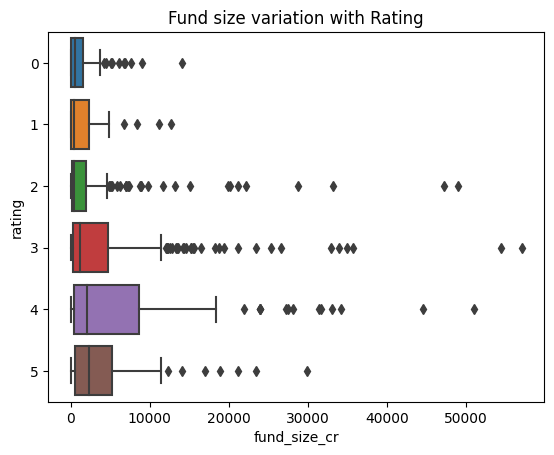

In [57]:
sns.boxplot(data = df,x=df['fund_size_cr'],y=df['rating'],orient='h')
plt.title('Fund size variation with Rating')
plt.show()

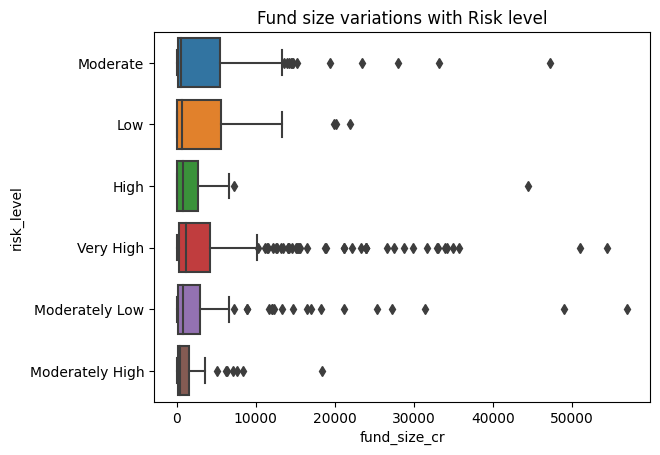

In [59]:
sns.boxplot(data = df['fund_size_cr'],x=df['fund_size_cr'],y=df['risk_level'],orient='h')
plt.title('Fund size variations with Risk level')
plt.show()

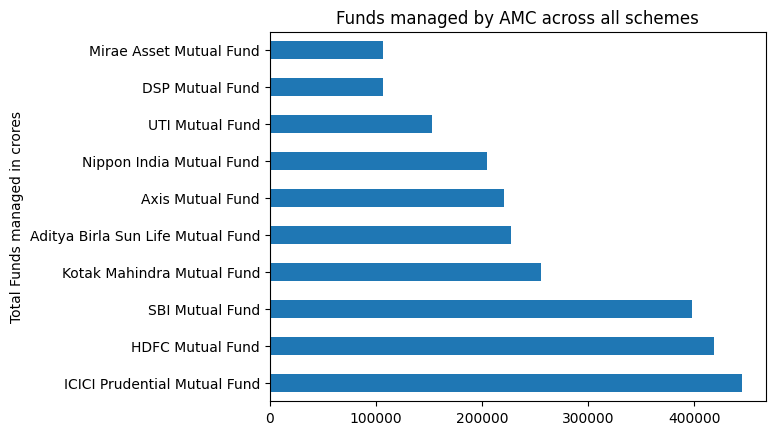

In [60]:
df.groupby('amc_name')['fund_size_cr'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.ylabel('Total Funds managed in crores')
plt.title('Funds managed by AMC across all schemes')
plt.show()

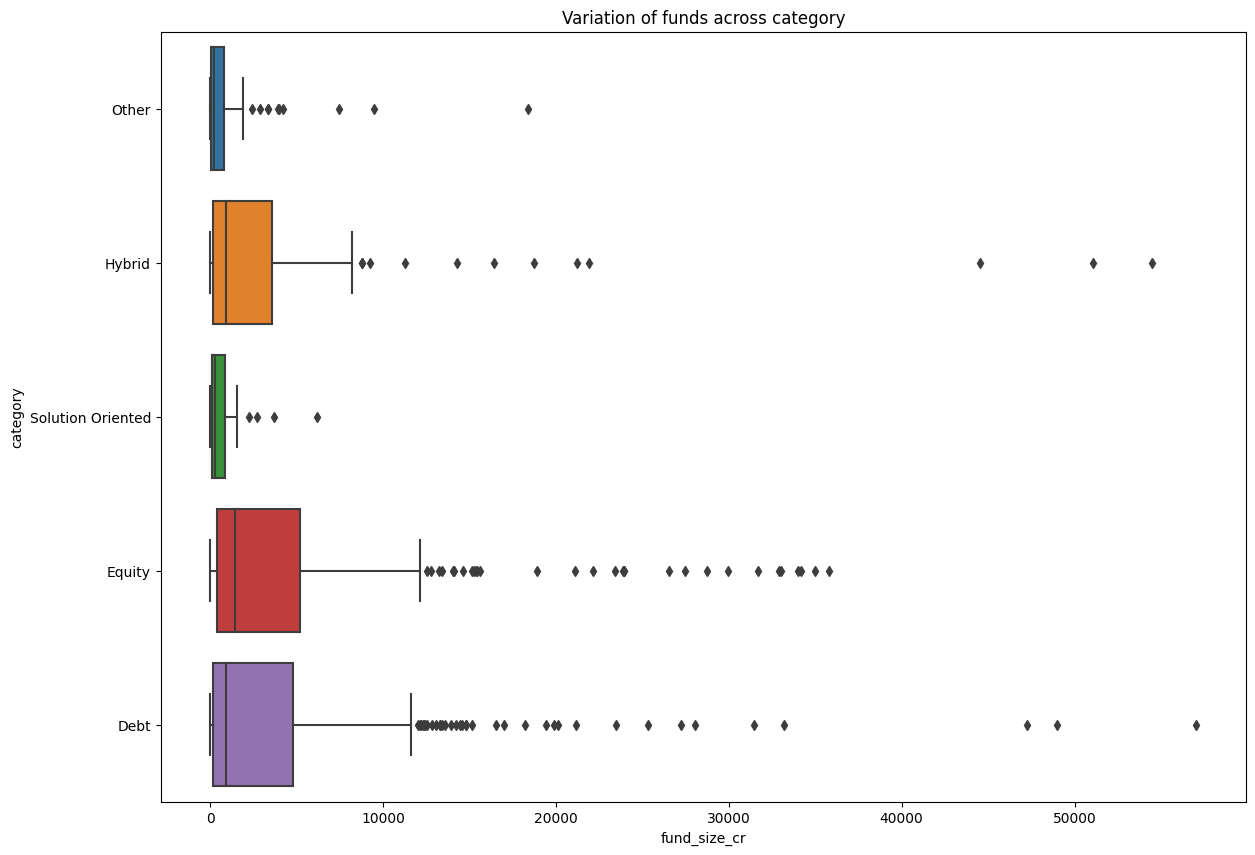

In [62]:
plt.figure(figsize=(14,10))
sns.boxplot(data = df,y=df['category'],x=df['fund_size_cr'])
plt.title('Variation of funds across category')
plt.show()

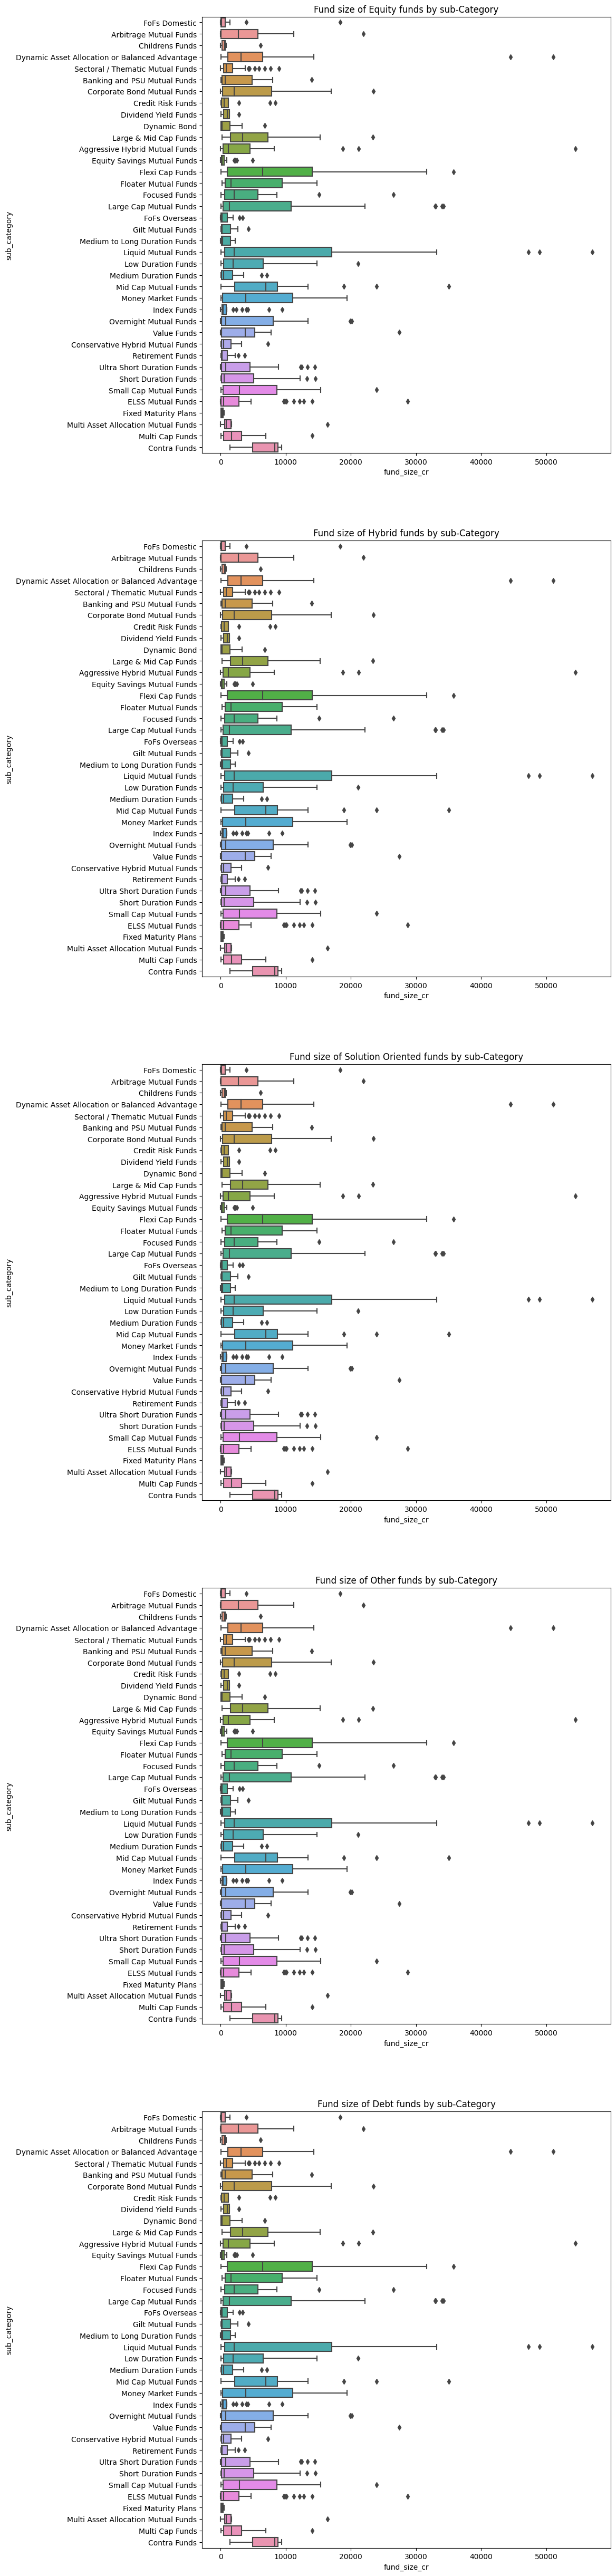

In [70]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 8))

sns.boxplot(data = equity_df, y=df['sub_category'], x=df['fund_size_cr'],ax=axes[0])
sns.boxplot(data= hybrid_df,y=df['sub_category'],x=df['fund_size_cr'],ax=axes[1])
sns.boxplot(data = solution_df,y=df['sub_category'],x=df['fund_size_cr'],ax=axes[2])
sns.boxplot(data = other_df,y=df['sub_category'],x=df['fund_size_cr'],ax=axes[3])
sns.boxplot(data = debt_df,y=df['sub_category'],x=df['fund_size_cr'],ax=axes[4])

axes[0].set_title('Fund size of Equity funds by sub-Category')
axes[1].set_title('Fund size of Hybrid funds by sub-Category')
axes[2].set_title('Fund size of Solution Oriented funds by sub-Category')
axes[3].set_title('Fund size of Other funds by sub-Category')
axes[4].set_title('Fund size of Debt funds by sub-Category')

plt.subplots_adjust(bottom=14, top=20)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

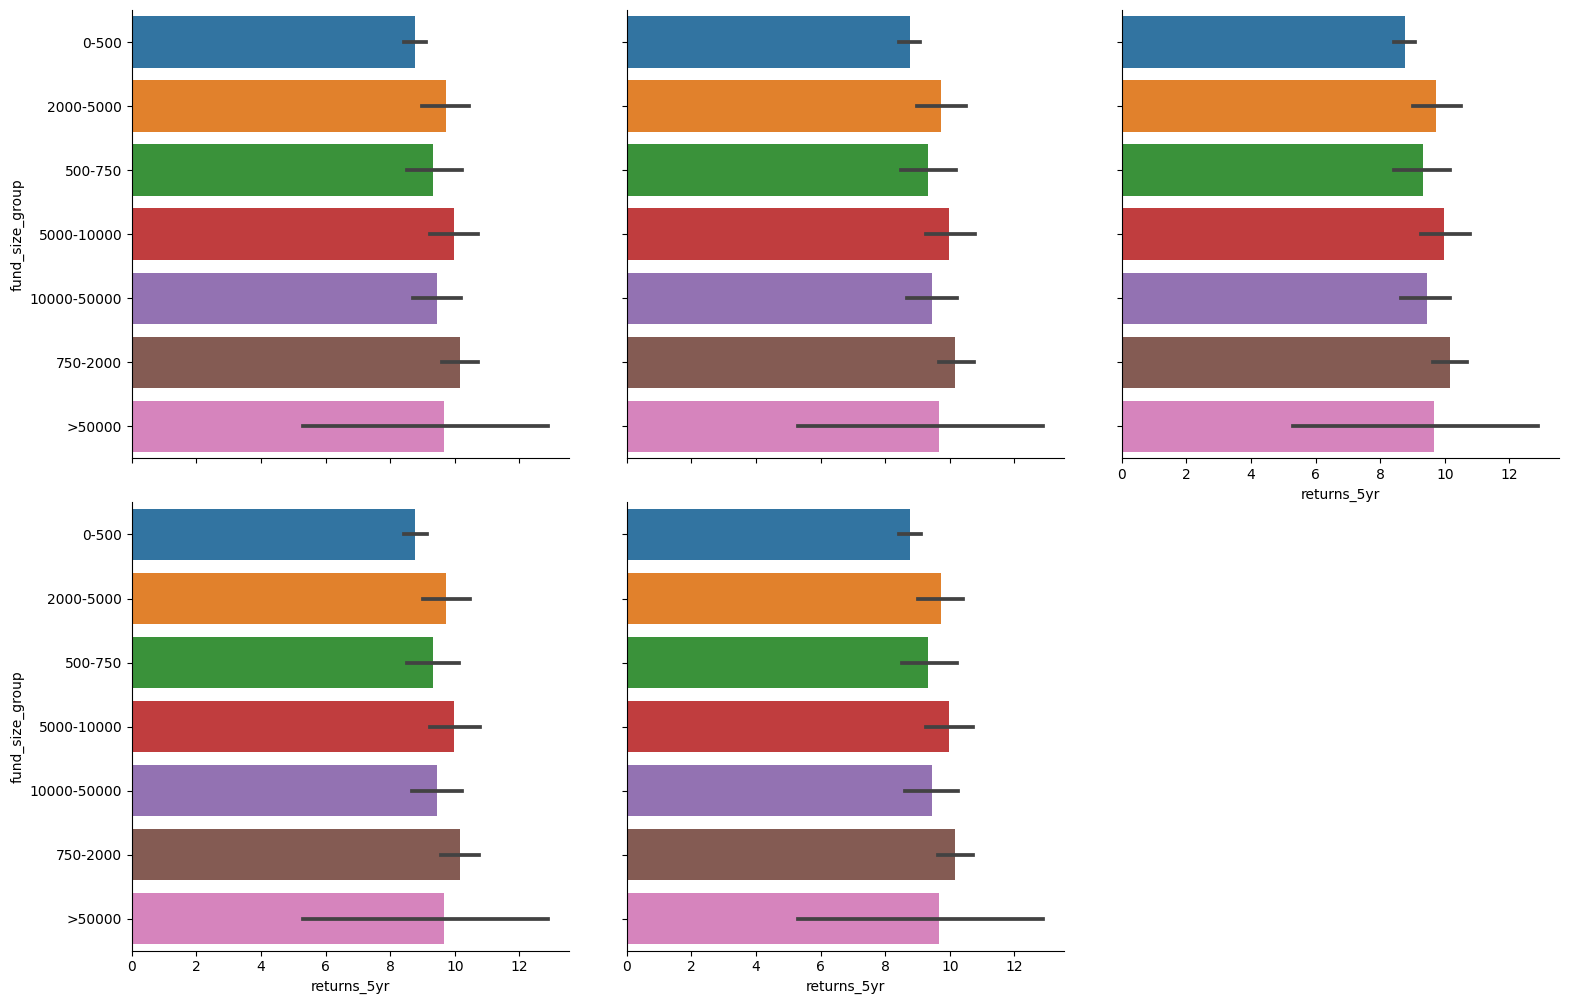

In [74]:
sns.catplot(data = df, y=df['fund_size_group'], x=df['returns_5yr'], col='category',col_wrap=3,kind='bar')
plt.subplots_adjust(top=0.8)
plt.suptitle('Variations of returns with Fund size',fontsize=15)
plt.show()

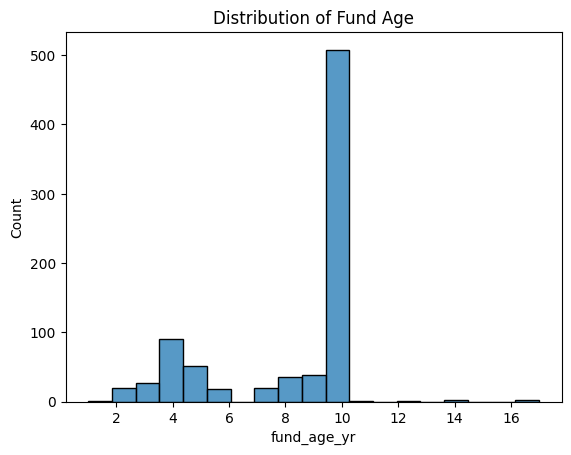

In [75]:
sns.histplot(df['fund_age_yr'])
plt.title('Distribution of Fund Age')
plt.show()

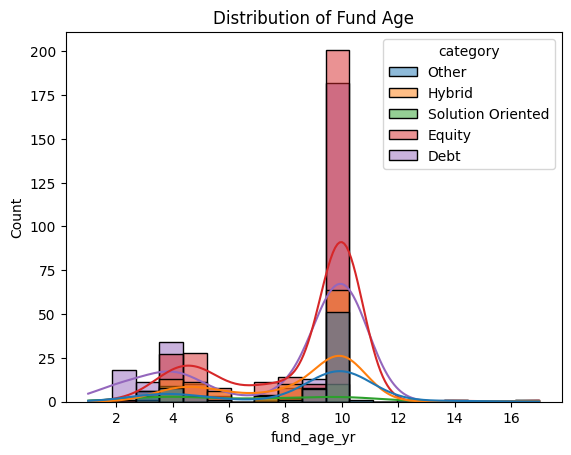

In [76]:
sns.histplot(data = df,x=df['fund_age_yr'],hue='category',kde=True)
plt.title('Distribution of Fund Age')
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

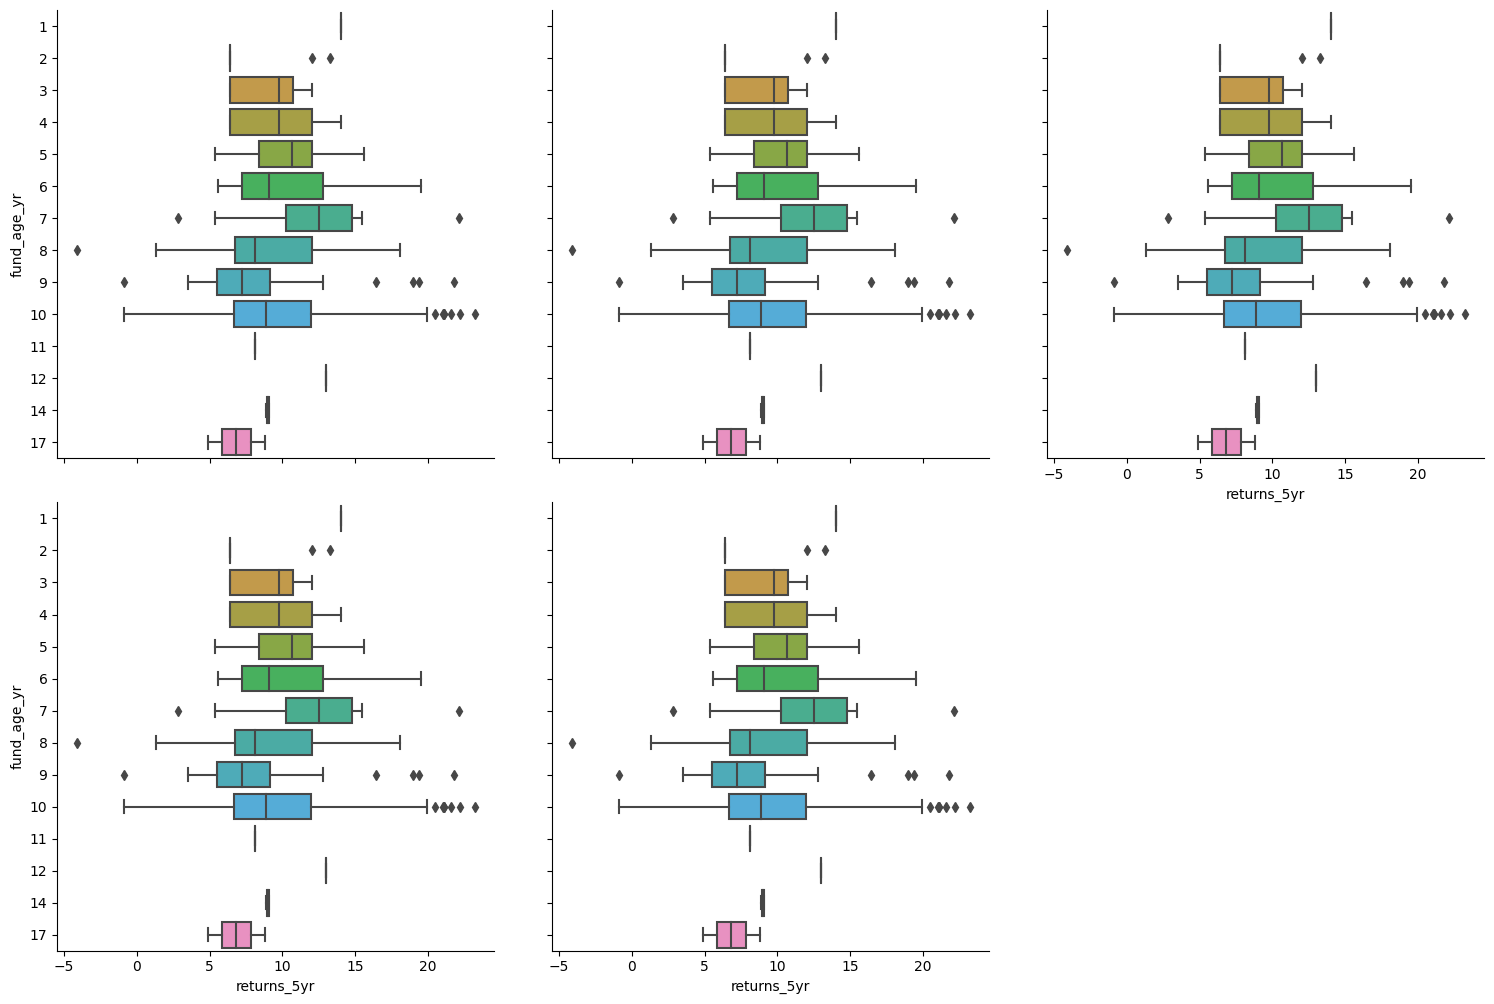

In [79]:
sns.catplot(data = df,x=df['returns_5yr'],y=df['fund_age_yr'],orient='h',kind='box',col='category',col_wrap=3)
plt.subplots_adjust(top=8)
plt.suptitle('Returns variations with Fund age',fontsize=15)
plt.show()

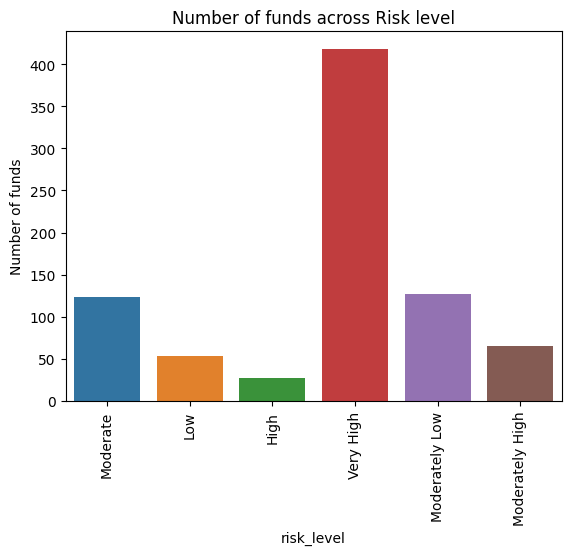

In [80]:
sns.countplot(data = df,x=df['risk_level'])
plt.title('Number of funds across Risk level')
plt.ylabel('Number of funds')
plt.xticks(rotation='vertical')
plt.show()

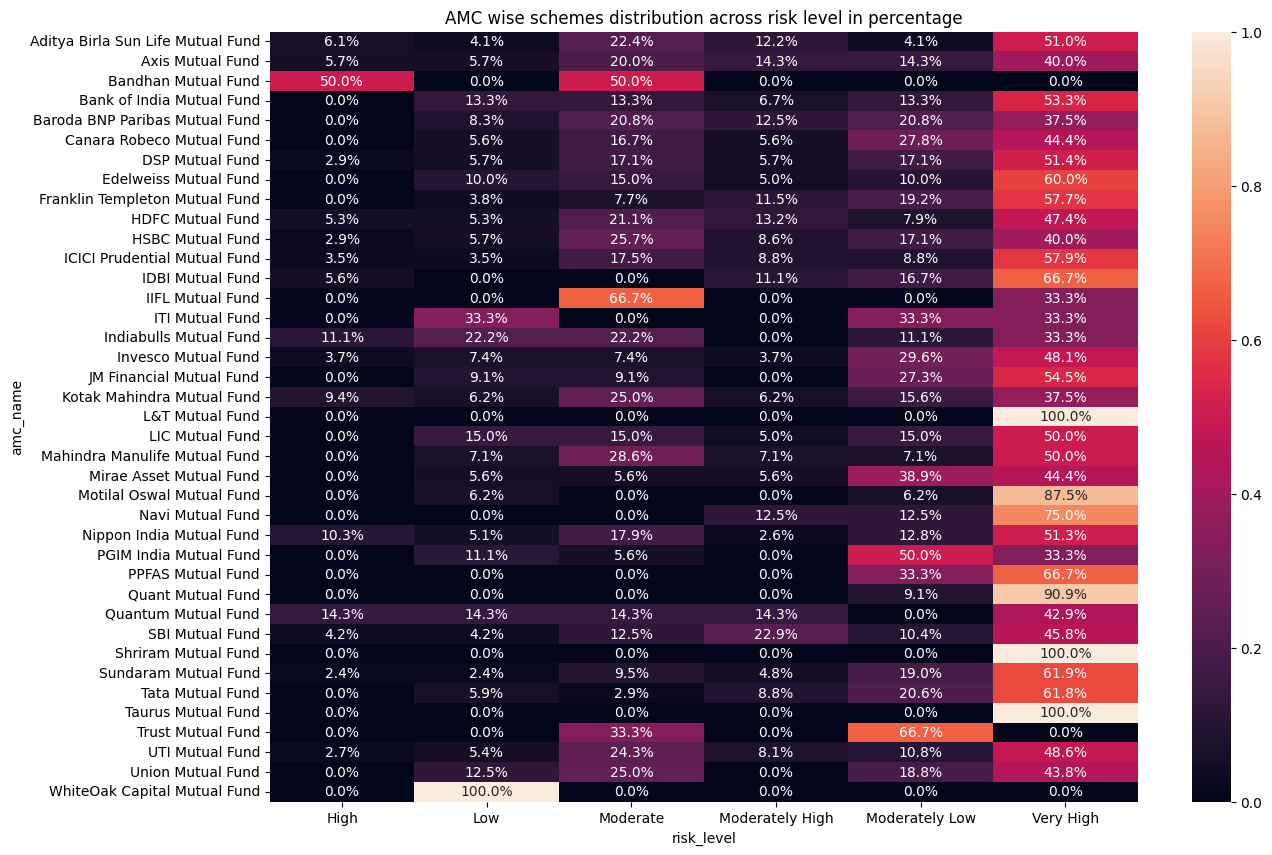

In [81]:
plt.figure(figsize=(14,10))
sns.heatmap(pd.crosstab(df['amc_name'],df['risk_level'],normalize='index'),annot=True,fmt='.1%')
plt.title('AMC wise schemes distribution across risk level in percentage')
plt.show()

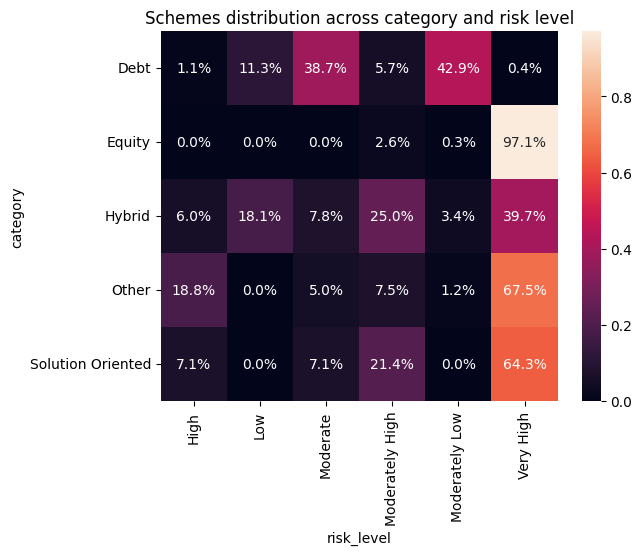

In [82]:
sns.heatmap(pd.crosstab(df['category'],df['risk_level'],normalize='index'),annot=True,fmt='.1%')
plt.title('Schemes distribution across category and risk level')
plt.show()

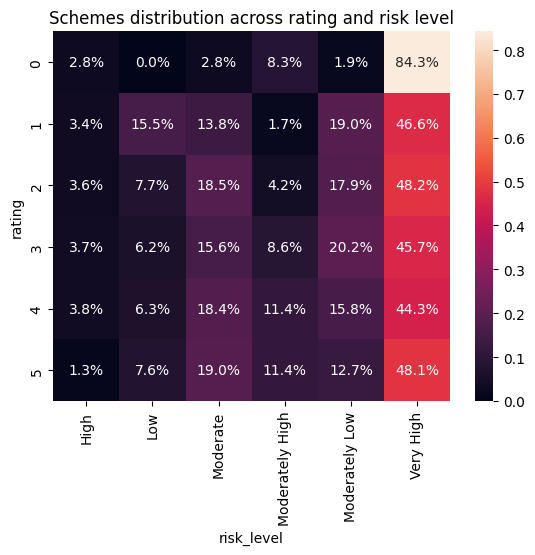

In [83]:
sns.heatmap(pd.crosstab(df['rating'],df['risk_level'],normalize='index'),annot=True,fmt='.1%')
plt.title('Schemes distribution across rating and risk level')
plt.show()

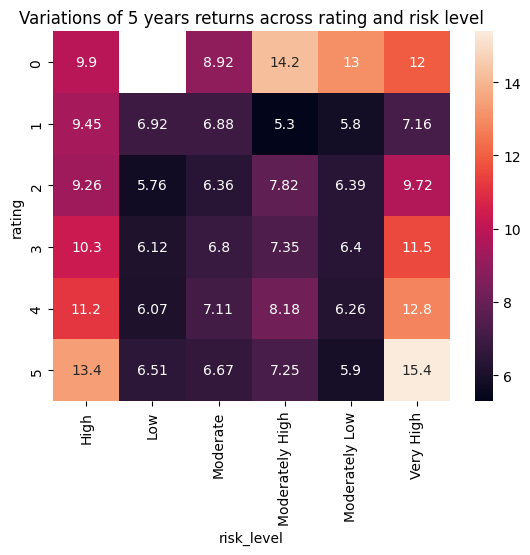

In [84]:
sns.heatmap(pd.pivot_table(data=df,index='rating',columns='risk_level',values='returns_5yr'),annot=True,fmt='.3g')
plt.title('Variations of 5 years returns across rating and risk level')
plt.show()

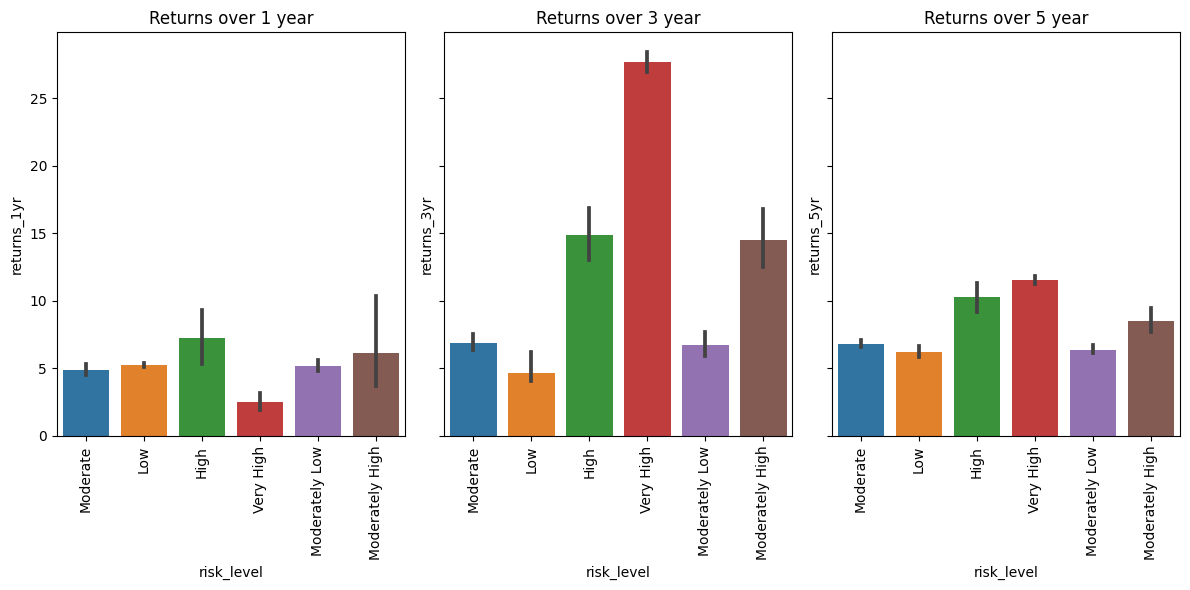

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6),sharey='row')
sns.barplot(data = df,x=df['risk_level'],y=df['returns_1yr'],ax=axes[0])
sns.barplot(data = df,x=df['risk_level'],y=df['returns_3yr'],ax=axes[1])
sns.barplot(data = df,x=df['risk_level'],y=df['returns_5yr'],ax=axes[2])
axes[0].set_title('Returns over 1 year')
axes[0].set_xticklabels(rotation='vertical',labels=df['risk_level'].unique())
axes[1].set_title('Returns over 3 year')
axes[1].set_xticklabels(rotation='vertical',labels=df['risk_level'].unique())
axes[2].set_title('Returns over 5 year')
axes[2].set_xticklabels(rotation='vertical',labels=df['risk_level'].unique())
plt.tight_layout()
plt.show()

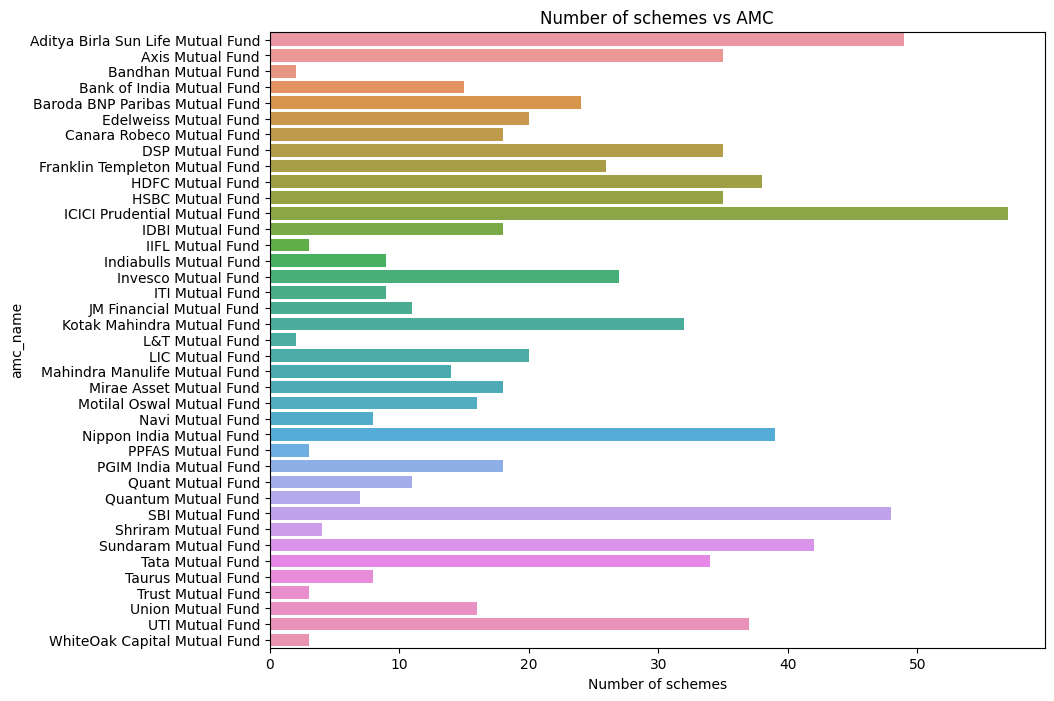

In [87]:
plt.figure(figsize=(10,8))
sns.countplot(data = df,y=df['amc_name'])
plt.title('Number of schemes vs AMC')
plt.xlabel('Number of schemes')
plt.show()

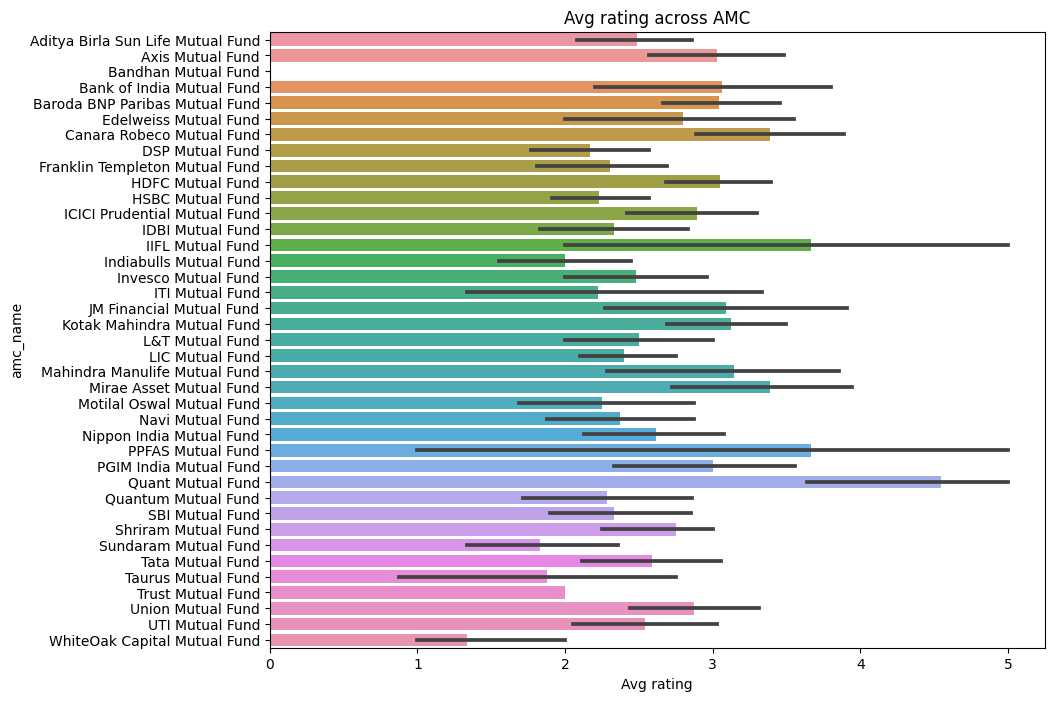

In [88]:
plt.figure(figsize=(10,8))
sns.barplot(data = df,y=df['amc_name'],x=df['rating'])
plt.title('Avg rating across AMC')
plt.xlabel('Avg rating')
plt.show()

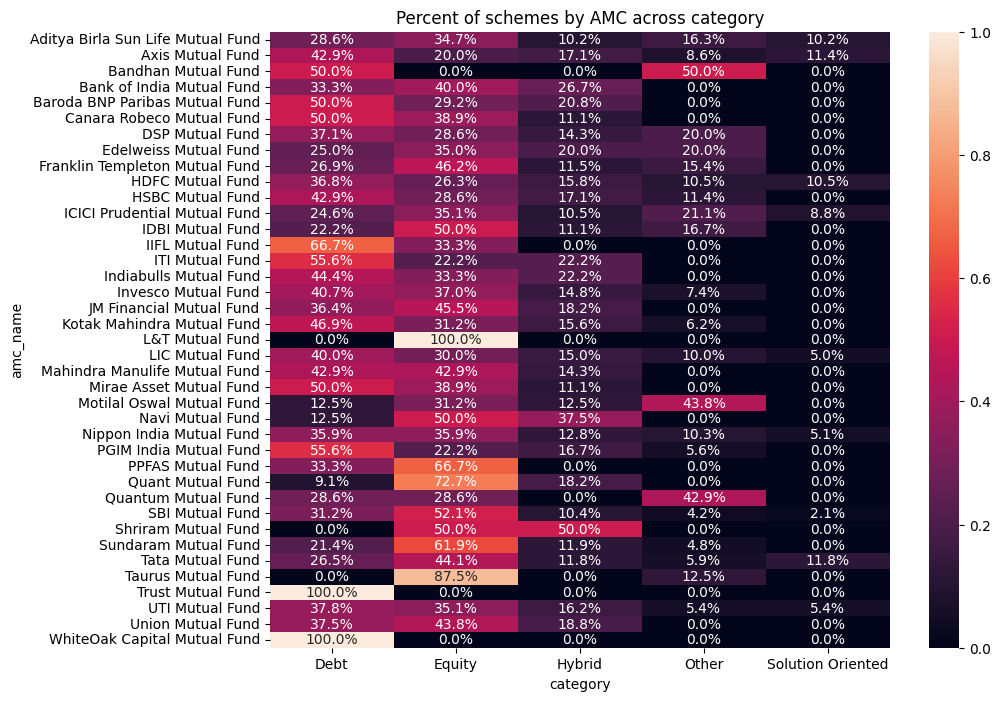

In [89]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.crosstab(df['amc_name'],df['category'],normalize='index'),annot=True,fmt='.1%')
plt.title('Percent of schemes by AMC across category')
plt.show()

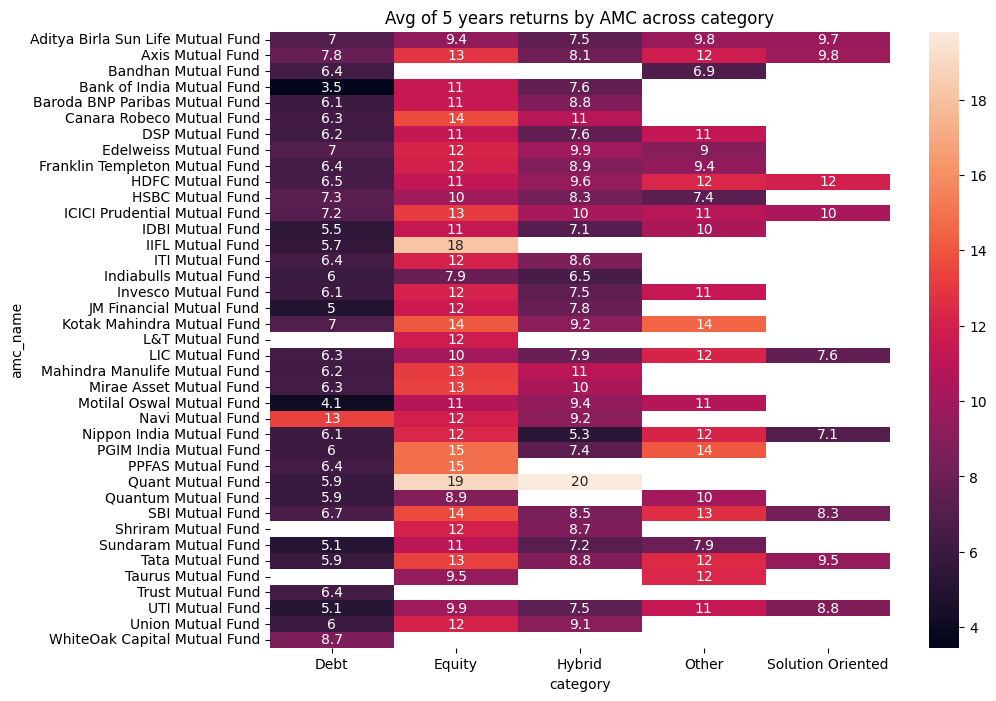

In [90]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.pivot_table(df,index='amc_name',columns='category',values='returns_5yr'),annot=True,fmt='.2g')
plt.title('Avg of 5 years returns by AMC across category')
plt.show()

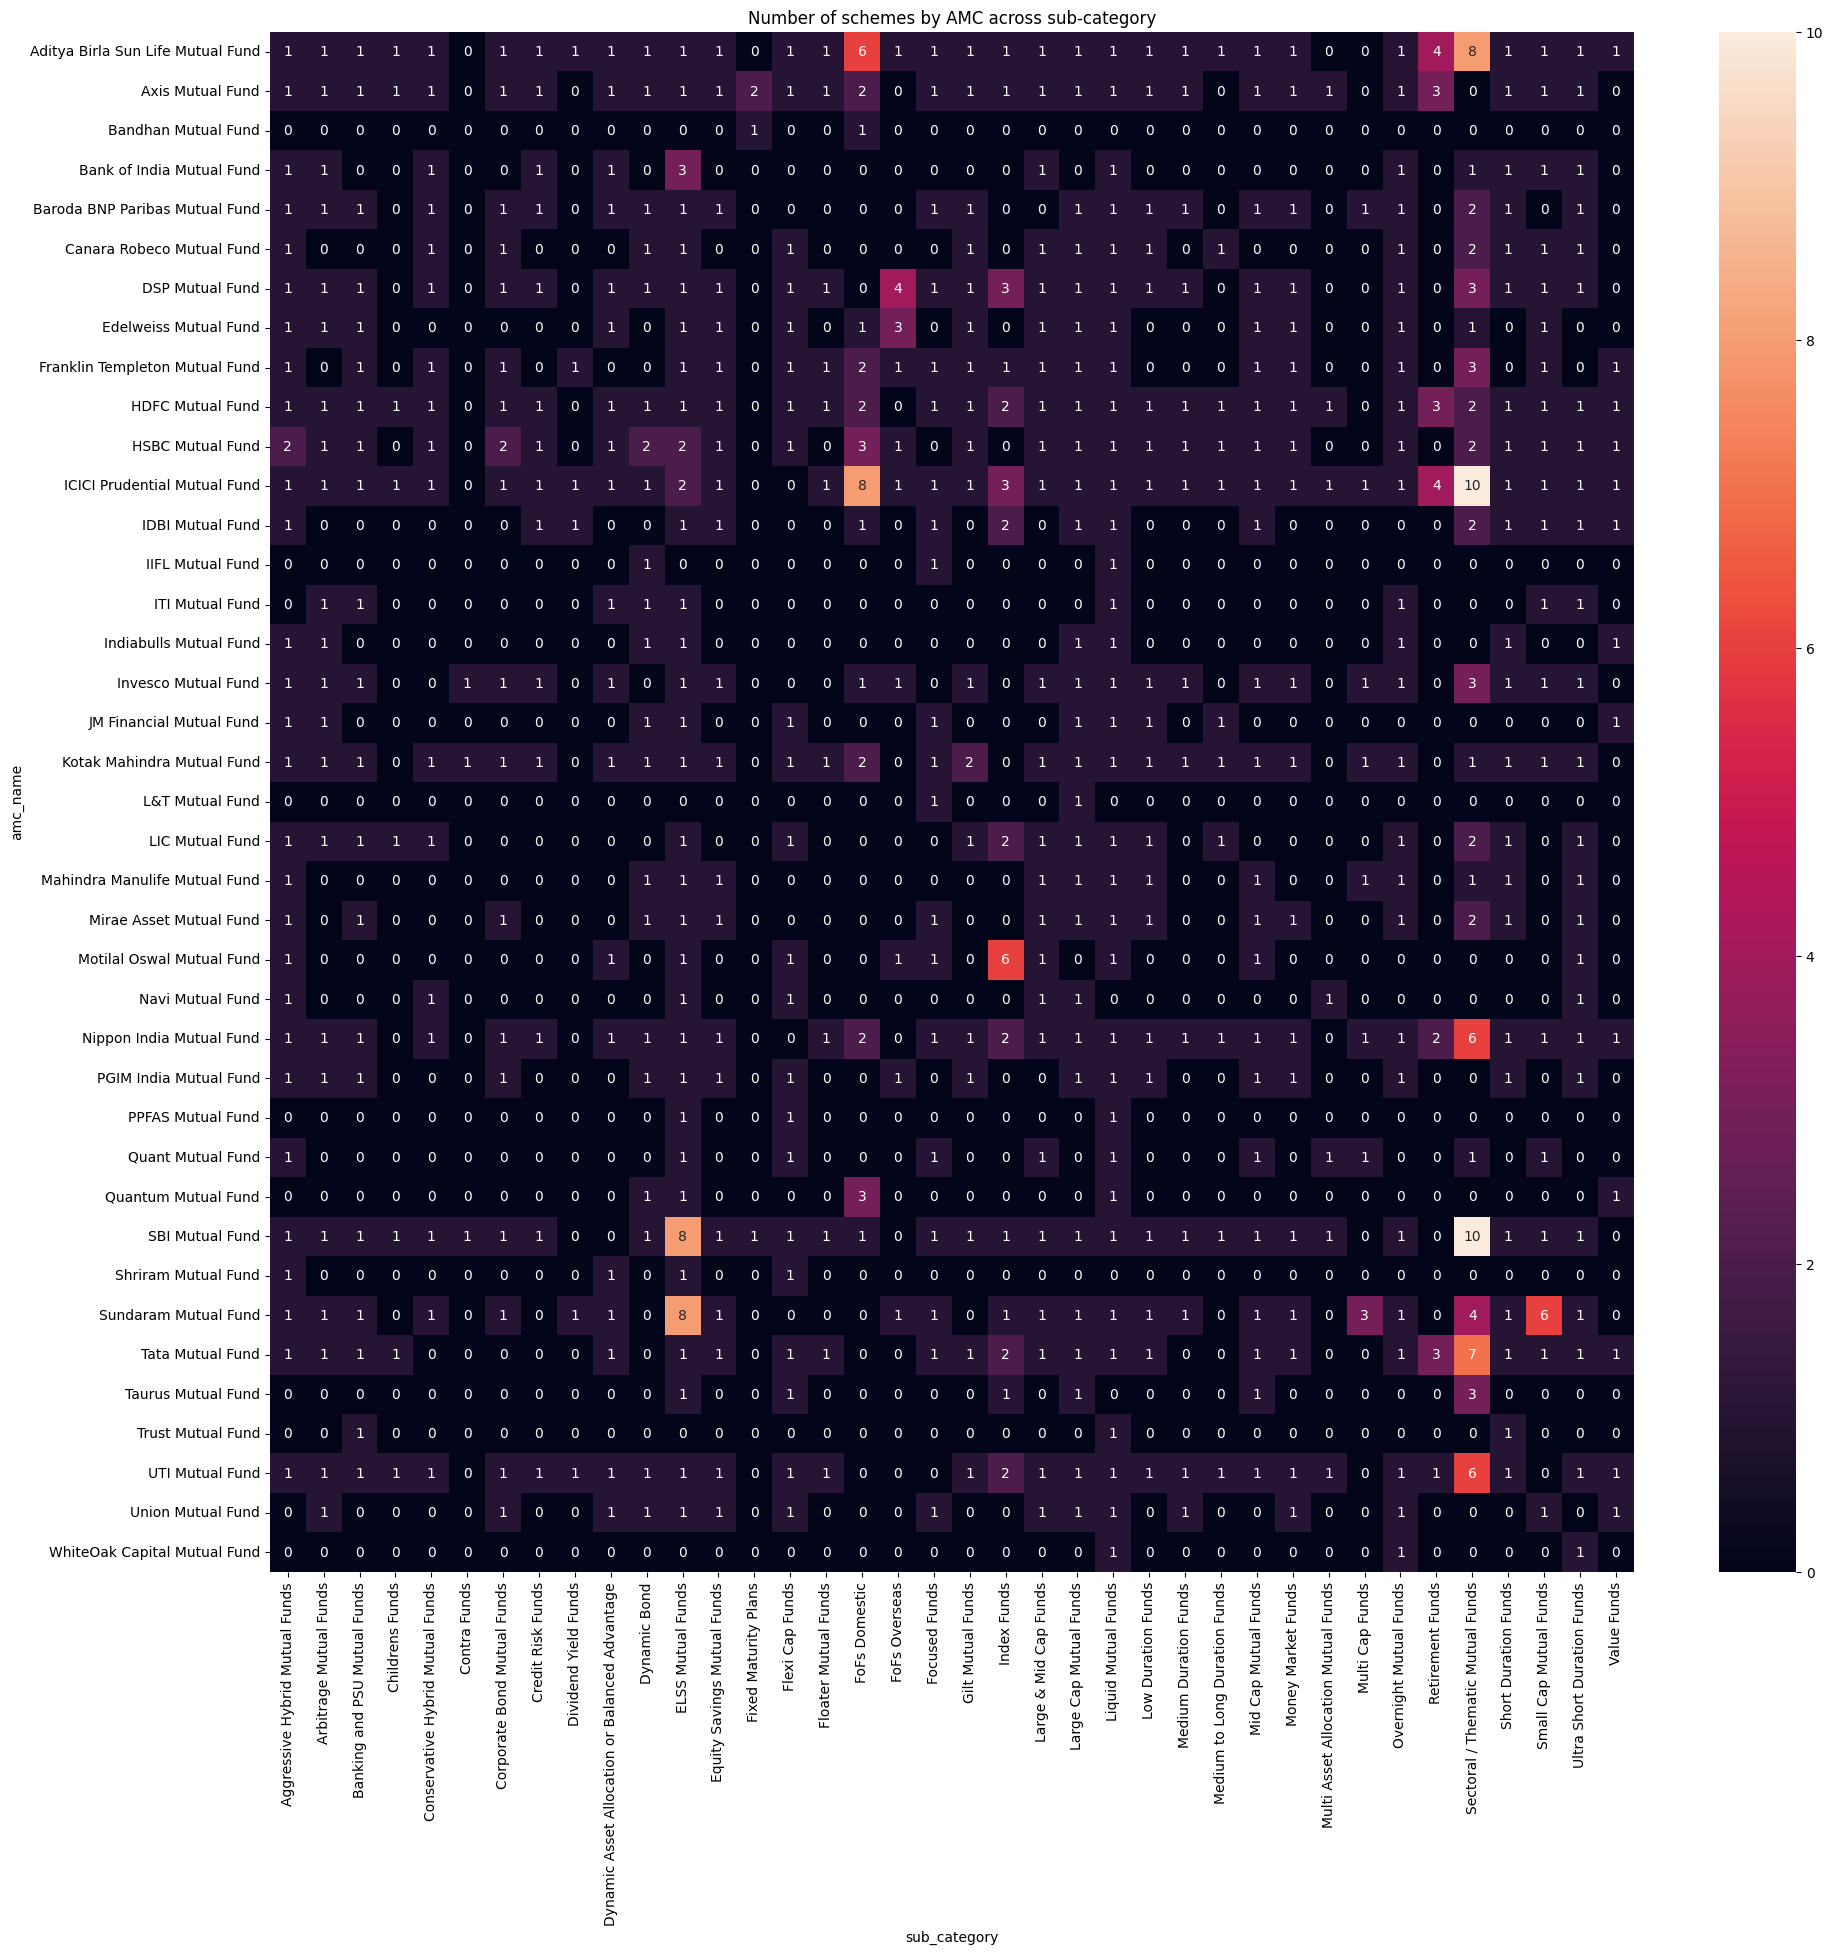

In [91]:
plt.figure(figsize=(22,20))
sns.heatmap(pd.crosstab(df['amc_name'],df['sub_category']),annot=True)
plt.title('Number of schemes by AMC across sub-category')
plt.show()

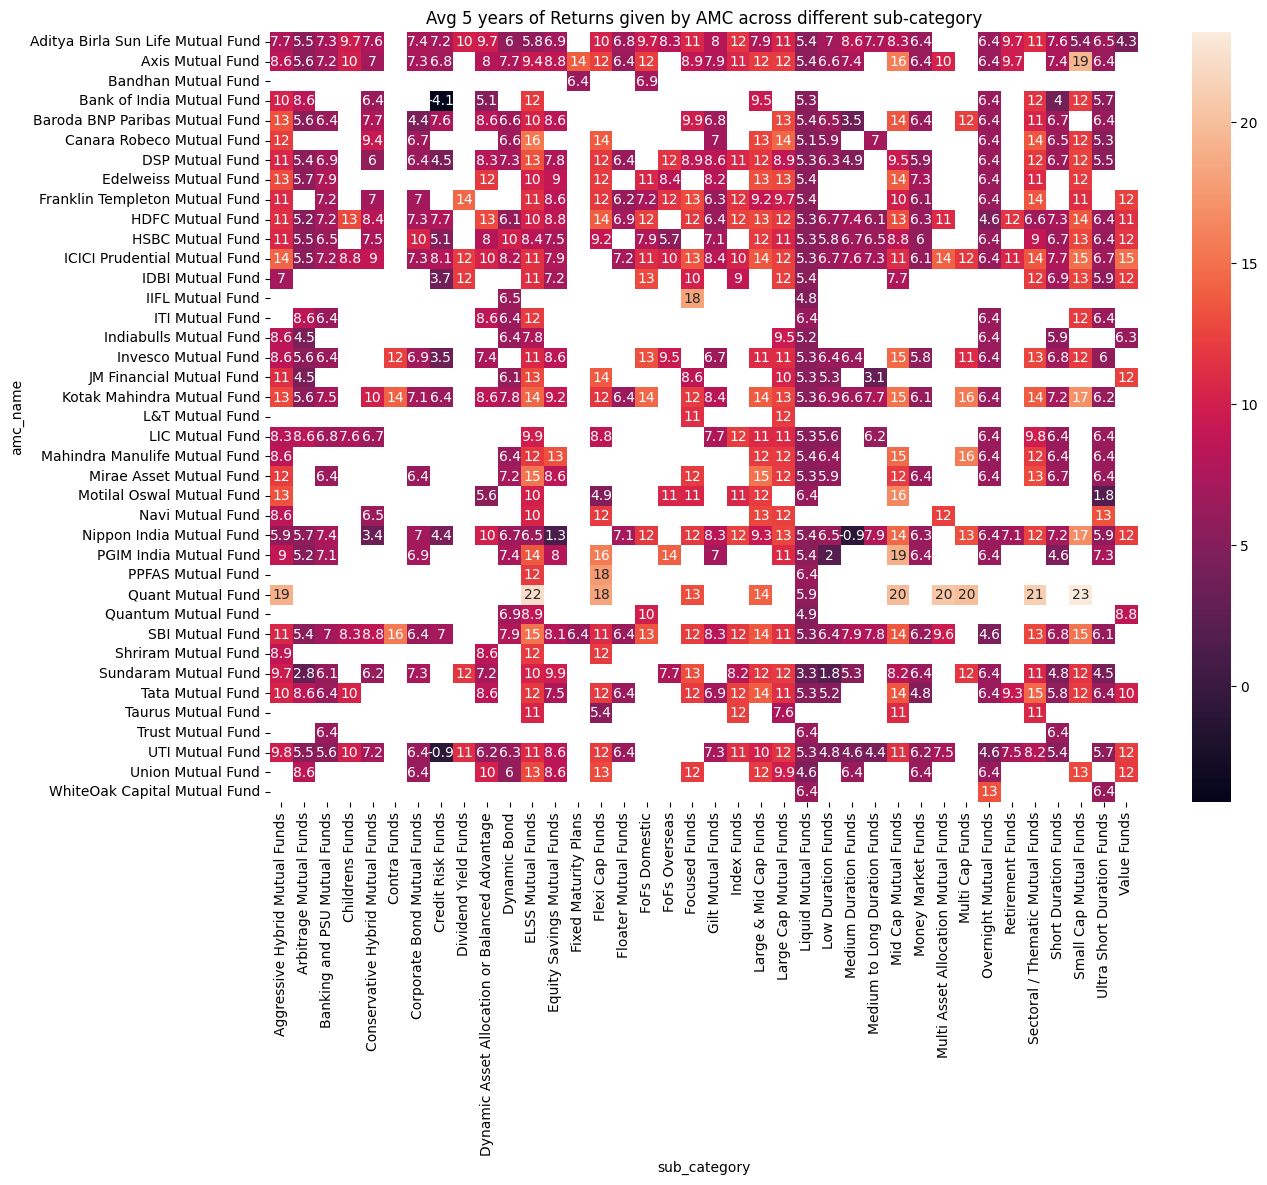

In [92]:
plt.figure(figsize=(14,10))
sns.heatmap(pd.pivot_table(df,index='amc_name',columns='sub_category',values='returns_5yr'),annot=True,fmt='.2g')
plt.title('Avg 5 years of Returns given by AMC across different sub-category')
plt.show()

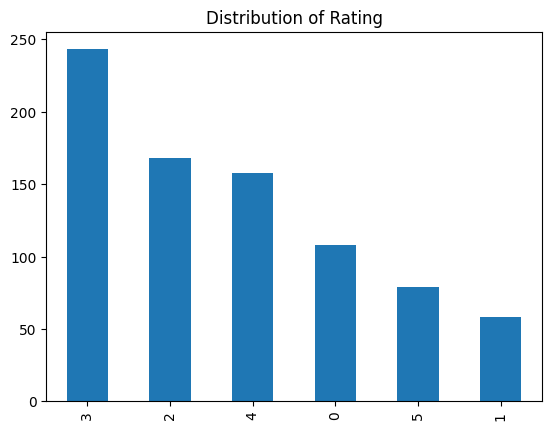

In [93]:
df['rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Rating')
plt.show()

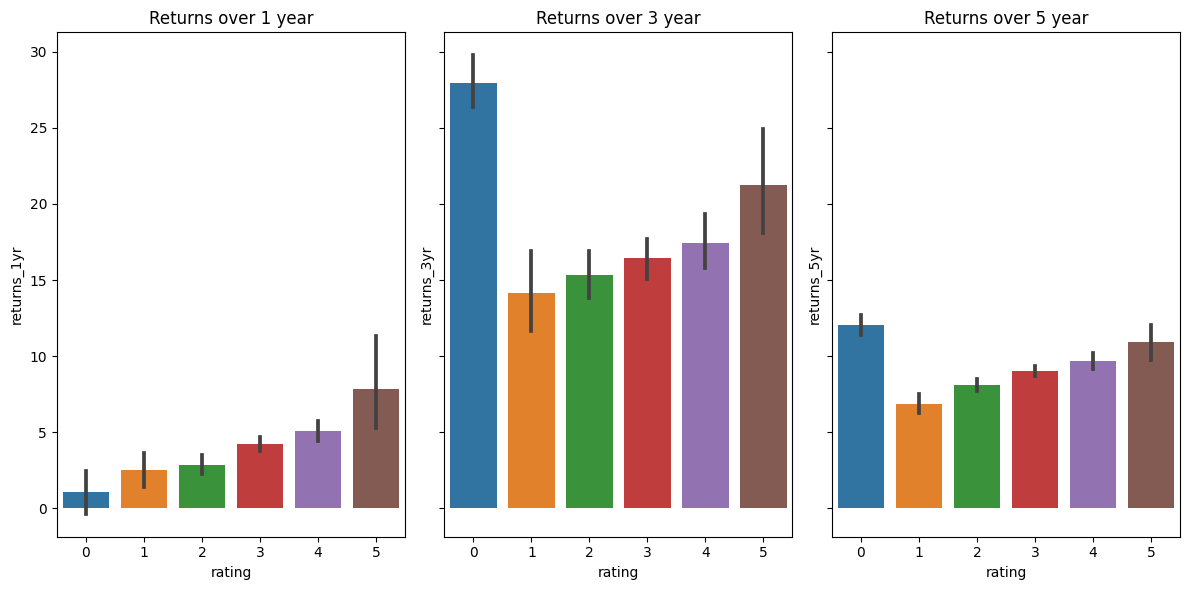

In [94]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6),sharey='row')

# Create a bar plot for each axis
sns.barplot(data = df,x=df['rating'],y=df['returns_1yr'],ax=axes[0])
sns.barplot(data = df,x=df['rating'],y=df['returns_3yr'],ax=axes[1])
sns.barplot(data = df,x=df['rating'],y=df['returns_5yr'],ax=axes[2])

# Set the title for each axis
axes[0].set_title('Returns over 1 year')
axes[1].set_title('Returns over 3 year')
axes[2].set_title('Returns over 5 year')

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='category', ylabel='rating'>

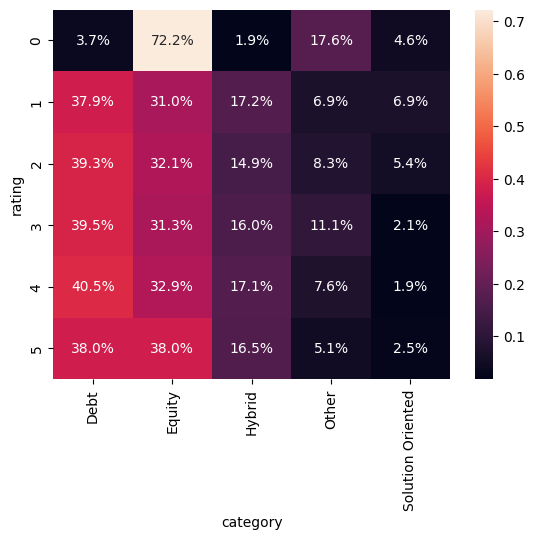

In [95]:
sns.heatmap(pd.crosstab(df['rating'],df['category'],normalize='index'),annot=True,fmt='.1%')

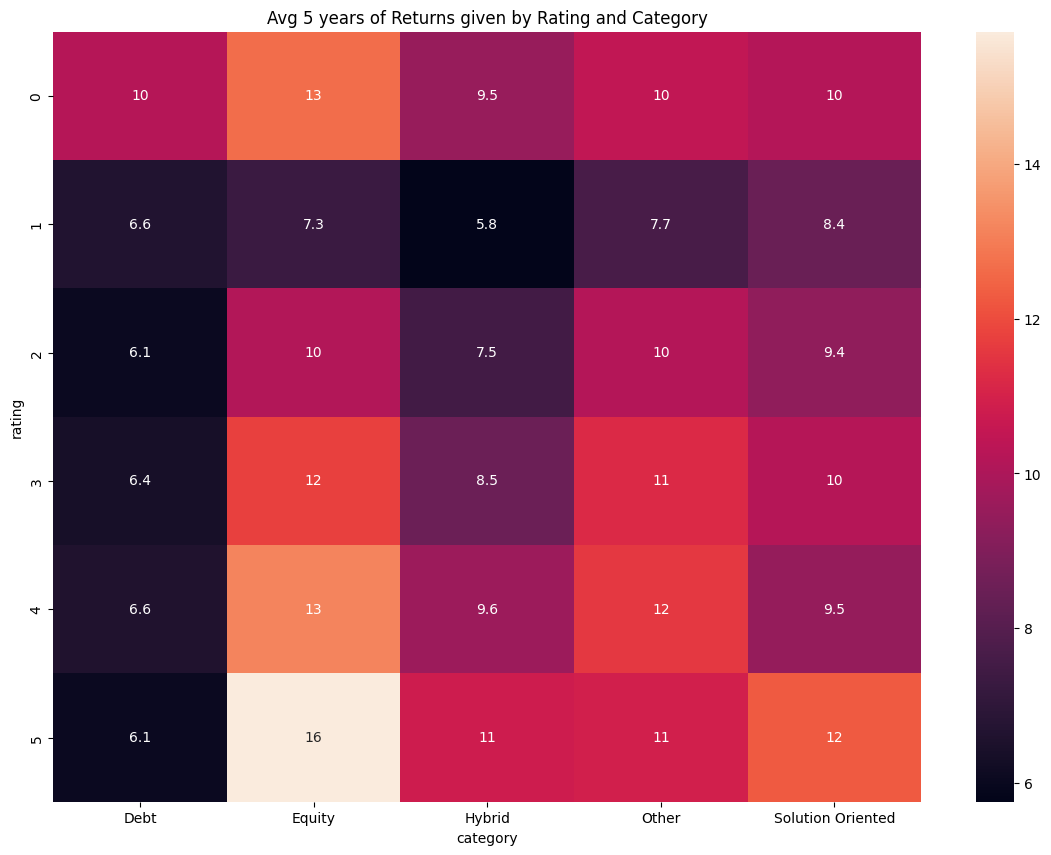

In [96]:
plt.figure(figsize=(14,10))
sns.heatmap(pd.pivot_table(df,index='rating',columns='category',values='returns_5yr'),annot=True,fmt='.2g')
plt.title('Avg 5 years of Returns given by Rating and Category')
plt.show()

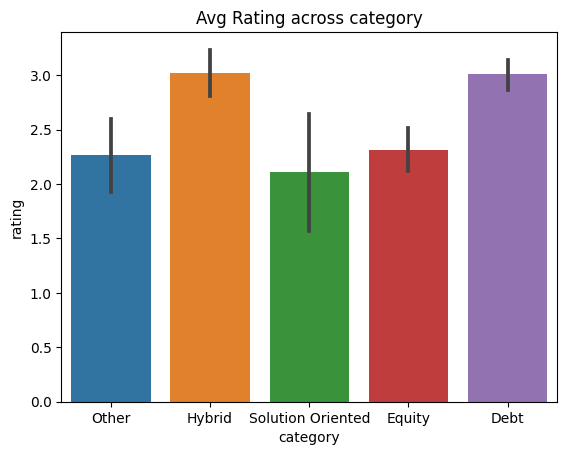

In [98]:
sns.barplot(data = df,x=df['category'],y=df['rating'])
plt.title('Avg Rating across category')
plt.show()

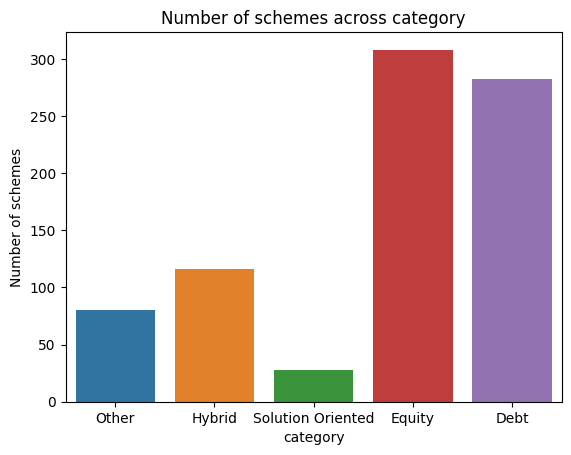

In [99]:
sns.countplot(data = df,x=df['category'])
plt.title('Number of schemes across category')
plt.ylabel('Number of schemes')
plt.show()

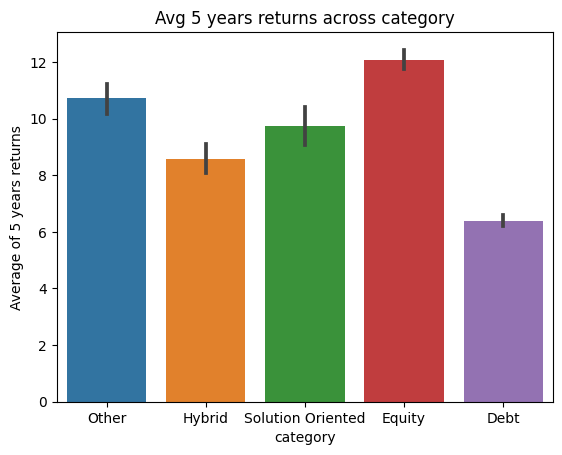

In [100]:
sns.barplot(data = df,x=df['category'],y=df['returns_5yr'])
plt.title('Avg 5 years returns across category')
plt.ylabel('Average of 5 years returns')
plt.show()

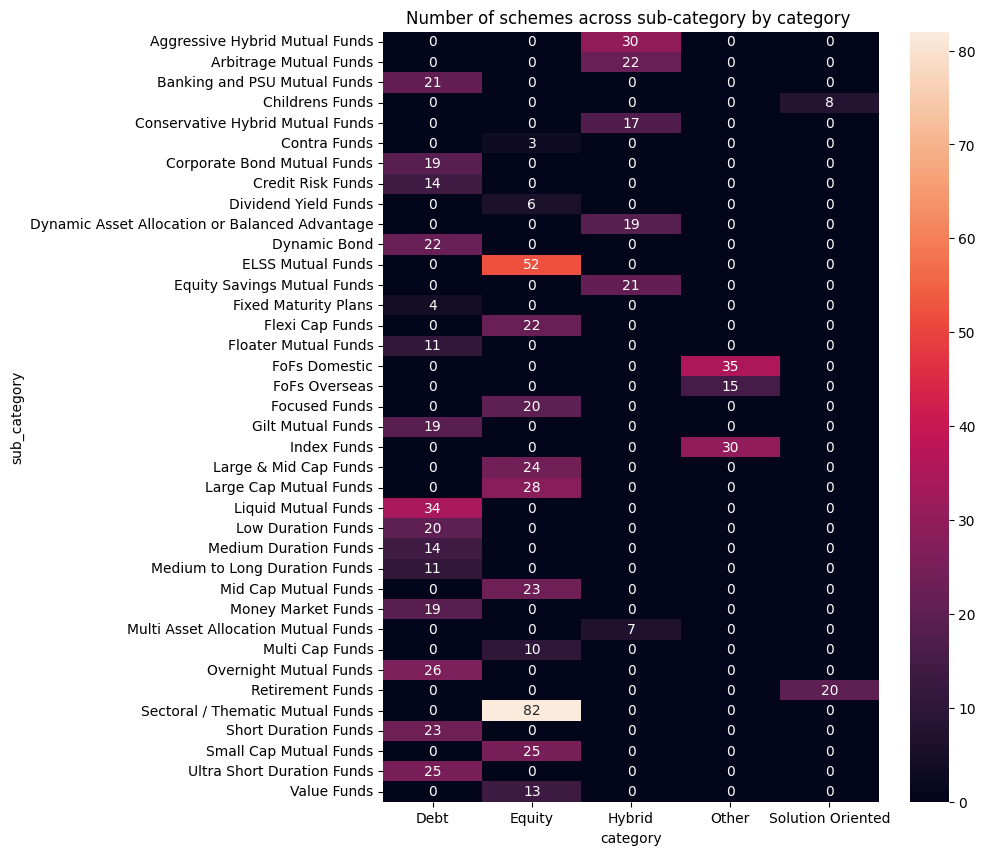

In [101]:
plt.figure(figsize=(8,10))
sns.heatmap(pd.crosstab(df['sub_category'],df['category']),annot=True,fmt='g')
plt.title('Number of schemes across sub-category by category ')
plt.show()

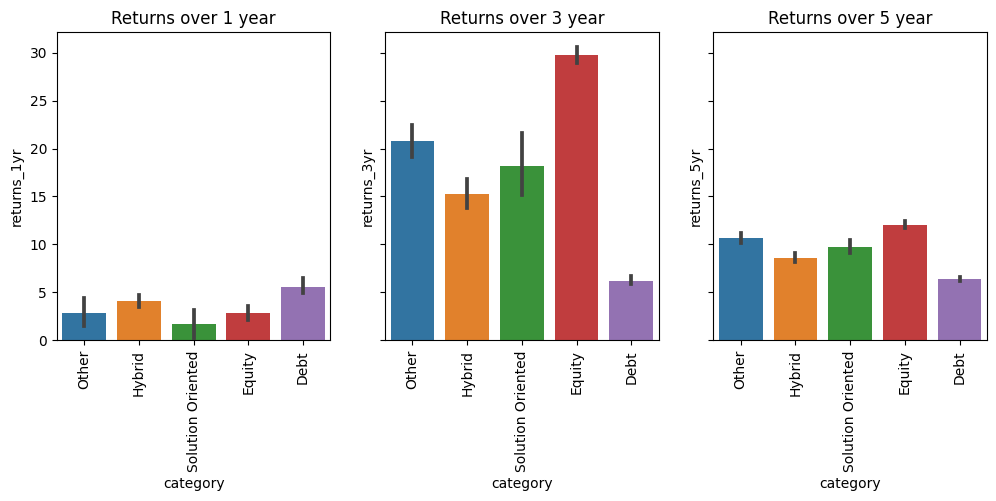

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4),sharey='row')
sns.barplot(data = df,x=df['category'],y=df['returns_1yr'],ax=axes[0])
sns.barplot(data = df,x=df['category'],y=df['returns_3yr'],ax=axes[1])
sns.barplot(data = df,x=df['category'],y=df['returns_5yr'],ax=axes[2])
axes[0].set_title('Returns over 1 year')
axes[0].set_xticklabels(df['category'].unique(),rotation='vertical')
axes[1].set_title('Returns over 3 year')
axes[1].set_xticklabels(df['category'].unique(),rotation='vertical')
axes[2].set_title('Returns over 5 year')
axes[2].set_xticklabels(df['category'].unique(),rotation='vertical')
plt.show()

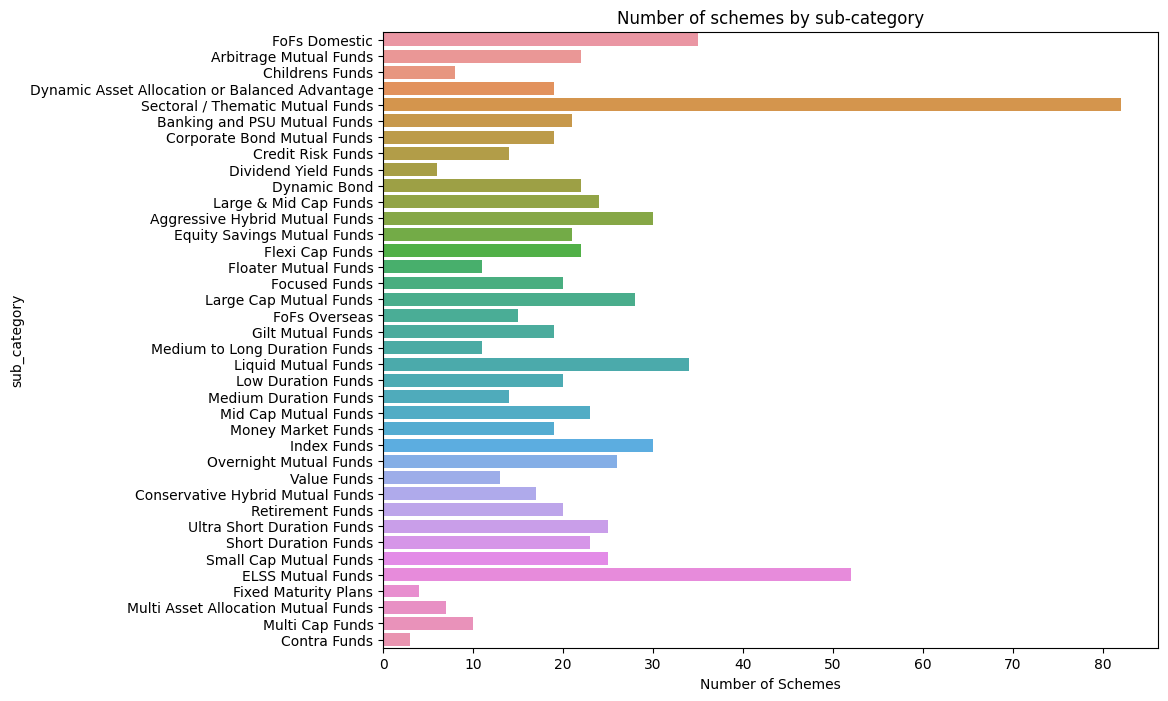

In [103]:
plt.figure(figsize=(10,8))
sns.countplot(data = df,y=df['sub_category'])
plt.title('Number of schemes by sub-category')
plt.xlabel('Number of Schemes')
plt.show()

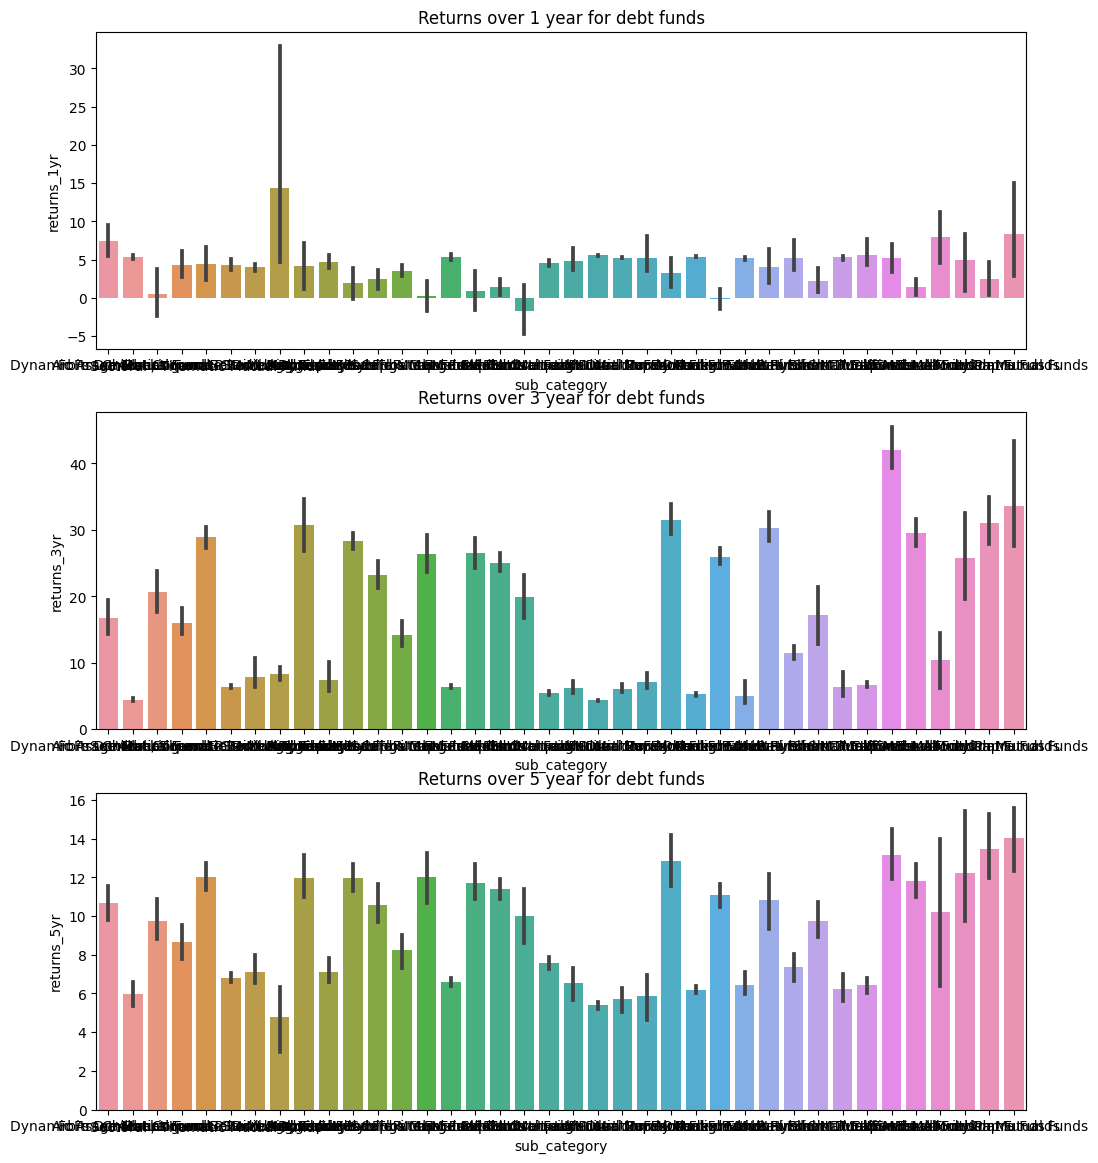

In [114]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,14))
sns.barplot(data = debt_df,x=df['sub_category'],y=df['returns_1yr'],ax=axes[0])
sns.barplot(data = debt_df,x=df['sub_category'],y=df['returns_3yr'],ax=axes[1])
sns.barplot(data = debt_df,x=df['sub_category'],y=df['returns_5yr'],ax=axes[2])
axes[0].set_title('Returns over 1 year for debt funds')
axes[1].set_title('Returns over 3 year for debt funds')
axes[2].set_title('Returns over 5 year for debt funds')
plt.show()

KeyError: "None of [Index(['Sectoral / Thematic Mutual Funds', 'Sectoral / Thematic Mutual Funds',\n       'Sectoral / Thematic Mutual Funds', 'Dividend Yield Funds',\n       'Large & Mid Cap Funds', 'Flexi Cap Funds', 'Focused Funds',\n       'Large Cap Mutual Funds', 'Sectoral / Thematic Mutual Funds',\n       'Sectoral / Thematic Mutual Funds',\n       ...\n       'Flexi Cap Funds', 'Sectoral / Thematic Mutual Funds',\n       'Sectoral / Thematic Mutual Funds', 'Sectoral / Thematic Mutual Funds',\n       'ELSS Mutual Funds', 'Large Cap Mutual Funds', 'Mid Cap Mutual Funds',\n       'Sectoral / Thematic Mutual Funds', 'Sectoral / Thematic Mutual Funds',\n       'Value Funds'],\n      dtype='object', length=308)] are in the [columns]"

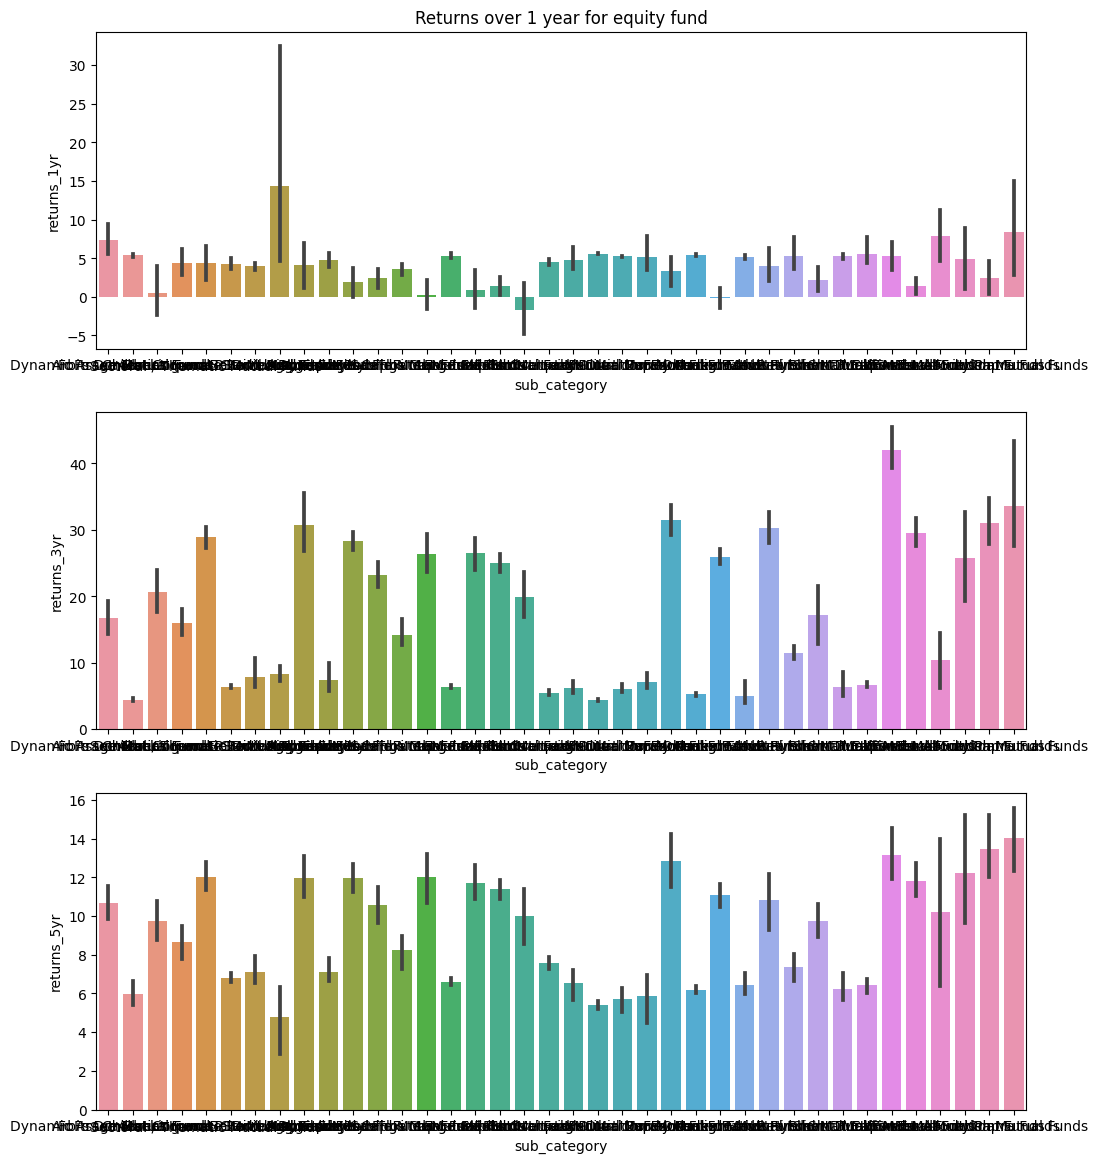

In [118]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,14),sharey='row')
sns.barplot(data = equity_df,x=df['sub_category'],y=df['returns_1yr'],ax=axes[0])
sns.barplot(data = equity_df,x=df['sub_category'],y=df['returns_3yr'],ax=axes[1])
sns.barplot(data = equity_df,x=df['sub_category'],y=df['returns_5yr'],ax=axes[2])
axes[0].set_title('Returns over 1 year for equity fund')
axes[0].set_xticklabels(df[equity_df['sub_category']].unique(),rotation='vertical')
axes[1].set_title('Returns over 3 year for equity fund')
axes[1].set_xticklabels(df[equity_df['sub_category']].unique(),rotation='vertical')
axes[2].set_title('Returns over 5 year for equity fund')
axes[2].set_xticklabels(df[equity_df['sub_category']].unique(),rotation='vertical')
plt.show()